# Flight Price Prediction Project

## Importing important Libraries

In [241]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer 
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Data Description

### Flight Price Prediction
#### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

#### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing DataSet

In [2]:
train_url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/fligh_data_Train.csv'
test_url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/flight_data_test.csv'
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

print(train_df.shape)
print(test_df.shape)

# For training dataset: 10683 rows and 11 columns are present
# for Testing dataset: 2671 rows and 10 columns are present

(10683, 11)
(2671, 10)


In [3]:
train_df.dtypes

# Airline            object
# Date_of_Journey    object
# Source             object
# Destination        object
# Route              object
# Dep_Time           object
# Arrival_Time       object
# Duration           object
# Total_Stops        object
# Additional_Info    object

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [4]:
# Converting 'Date of Journey' column in Datetime format because by default it is in object type
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'])  # For Train dataset
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'])    # For Test dataset
train_df.dtypes

# Airline                    object
# Date_of_Journey    datetime64[ns]
# Source                     object
# Destination                object
# Route                      object
# Dep_Time                   object
# Arrival_Time               object
# Duration                   object
# Total_Stops                object
# Additional_Info            object
# Price                       int64

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [5]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [6]:
train_df.head()  # top 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_df.sample(4)   # 4 random column

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8299,Jet Airways,2019-05-21,Kolkata,Banglore,CCU ? DEL ? BLR,20:25,09:45 22 May,13h 20m,1 stop,In-flight meal not included,12384
7092,SpiceJet,2019-04-24,Kolkata,Banglore,CCU ? BLR,06:55,09:30,2h 35m,non-stop,No check-in baggage included,3841
2969,Jet Airways,2019-06-18,Banglore,Delhi,BLR ? DEL,11:10,14:05,2h 55m,non-stop,No info,8016
6783,Jet Airways,2019-01-04,Kolkata,Banglore,CCU ? DEL ? BLR,20:25,10:55 02 Apr,14h 30m,1 stop,No info,11467


In [8]:
train_df.tail()      # 5 bottom rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-09-05,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Information about dataset

In [9]:
train_df.info()

 #   Column           Non-Null Count  Dtype         
# ---  ------           --------------  -----         
#  0   Airline          10683 non-null  object        
#  1   Date_of_Journey  10683 non-null  datetime64[ns]
#  2   Source           10683 non-null  object        
#  3   Destination      10683 non-null  object        
#  4   Route            10682 non-null  object        
#  5   Dep_Time         10683 non-null  object        
#  6   Arrival_Time     10683 non-null  object        
#  7   Duration         10683 non-null  object        
#  8   Total_Stops      10682 non-null  object        
#  9   Additional_Info  10683 non-null  object        
#  10  Price            10683 non-null  int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


## Checking Null Values

In [10]:
train_df.isnull().sum()
# Two null values are found in 'Route' and 'Total_Stops' Columns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_df.isnull().sum().sum()
# total 2 null values found in whole training dataset

2

In [12]:
# As we found only 2 values null , therefore we can delete this rows, from the datasete that will not 
#impact much to our dataset because we are having already a big dataset for building a model
train_df.dropna(inplace = True)

In [13]:
train_df.isnull().sum().sum()

# 0 null value has been removed from the trained dataset

0

<AxesSubplot:>

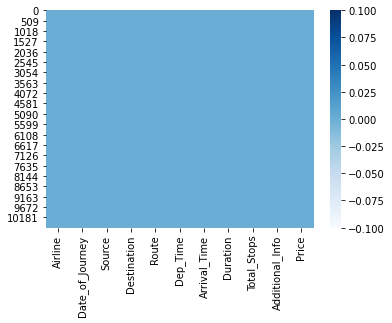

In [14]:
sns.heatmap(train_df.isnull(), cmap = 'Blues')  # Graphical representation of Non null dataset
# heatmap is clear not null value present in the dataset

In [15]:
train_df.shape 
# (10682, 11)

# At the initial stage we was having 10683 rows and now 10682 rows, means only row is removed to remove
# null value from the dataset, which is acceptable

(10682, 11)

In [16]:
test_df.isnull().sum().sum()

# No null values are present in testing data

0

## Data Preprocessing

In [17]:
train_df.dtypes

# Airline                    object
# Date_of_Journey    datetime64[ns]
# Source                     object
# Destination                object
# Route                      object
# Dep_Time                   object
# Arrival_Time               object
# Duration                   object
# Total_Stops                object
# Additional_Info            object
# Price                       int64

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

##### Creation of new columns

In [18]:
# 'Day of Journey' and 'Month of Journey' is created from 'Date of Journey column'
# Year of Journey is not created because each record is containing same year, therefore year not extracted

train_df['Day_of_Journey'] =  train_df['Date_of_Journey'].dt.day  # for Train dataset
train_df['Month_of_Journey'] =  train_df['Date_of_Journey'].dt.month

In [19]:
# Doing same operation for Testing dataset
test_df['Day_of_Journey'] =  test_df['Date_of_Journey'].dt.day
test_df['Month_of_Journey'] =  test_df['Date_of_Journey'].dt.month

In [20]:
# shape of train and test data
print(train_df.shape)
print(test_df.shape)

# (10682, 13)
# (2671, 12)

(10682, 13)
(2671, 12)


In [21]:
train_df.head(2)  # Top 2 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [22]:
# ------------------------Train dataset-----------------------------------
# In the 'duration' colums some records are containing only hours or some are containing only minutes, therefore
# i have perform a operation to convert them all into hours and minutes format 

duration_lst = list(train_df["Duration"])

for i in range(len(duration_lst)):
    if len(duration_lst[i].split()) < 2:    
        if 'h' in duration_lst[i]:
            duration_lst[i] = duration_lst[i].strip() + " 0m"  
        else:
            duration_lst[i] = "0h " + duration_lst[i]         

In [23]:
# Creating list for hour duration and minutes duration
duration_hours = []
duration_minutes = []

for i in duration_lst:
    duration_hours.append( int(i.split(' ')[0].replace('h', '')))   # first split then store first string and replace with ''
    duration_minutes.append(int(i.split(' ')[1].replace('m', '')))  # first split then store second  string and replace m with '' 

In [24]:
# creating Duration hours and Duration minutes columns recpectively 
train_df['Duration_Hours'] = duration_hours
train_df['duration_minutes'] = duration_minutes

In [25]:
train_df.head(2)  # Top 2 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7,25


In [26]:
# ----------------------------for Test dataset----------------------------
# Same operation is doing for test dataset too
# I have to perform all operation to the train and test dataset

duration_lst2 = list(test_df["Duration"])
for i in range(len(duration_lst2)):
    if len(duration_lst2[i].split()) < 2:    
        if 'h' in duration_lst2[i]:
            duration_lst2[i] = duration_lst2[i].strip() + " 0m"  
        else:
            duration_lst2[i] = "0h " + duration_lst2[i]         
            
duration_hours2 = []
duration_minutes2 = []

for i in duration_lst2:
    duration_hours2.append( int(i.split(' ')[0].replace('h', '')))
    duration_minutes2.append(int(i.split(' ')[1].replace('m', '')))

In [27]:
# Creating new column of duration Hour and duration minutes in the testing dataset
test_df['Duration_Hours'] = duration_hours2
test_df['duration_minutes'] = duration_minutes2

In [28]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12,4,0


In [29]:
# We can extract hour and minutes seperating in different columns for that we need to convert this column
# into datatime format therefore,  Converting Dep_Time column in Datetime format

train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])  # for train dataset
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])    # for test dataset

In [30]:
train_df.dtypes  

# Airline                     object
# Date_of_Journey     datetime64[ns]
# Source                      object
# Destination                 object
# Route                       object
# Dep_Time            datetime64[ns]
# Arrival_Time                object
# Duration                    object
# Total_Stops                 object
# Additional_Info             object
# Price                        int64
# Day_of_Journey               int64
# Month_of_Journey             int64
# Duration_Hours               int64
# duration_minutes             int64

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Day_of_Journey               int64
Month_of_Journey             int64
Duration_Hours               int64
duration_minutes             int64
dtype: object

In [31]:
test_df.dtypes

# Airline                     object
# Date_of_Journey     datetime64[ns]
# Source                      object
# Destination                 object
# Route                       object
# Dep_Time            datetime64[ns]
# Arrival_Time                object
# Duration                    object
# Total_Stops                 object
# Additional_Info             object
# Price                        int64
# Day_of_Journey               int64
# Month_of_Journey             int64
# Duration_Hours               int64
# duration_minutes             int64

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Day_of_Journey               int64
Month_of_Journey             int64
Duration_Hours               int64
duration_minutes             int64
dtype: object

In [32]:
# Extration of new column of 'Dep_hour' and 'Dep_min' in both datasets train and test

train_df["Dep_hour"] = train_df["Dep_Time"].dt.hour  # For train dataset
train_df["Dep_min"] = train_df["Dep_Time"].dt.minute

test_df["Dep_hour"] = test_df["Dep_Time"].dt.hour  # For test dataset
test_df["Dep_min"] = test_df["Dep_Time"].dt.minute

In [33]:
train_df.head(2) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2021-12-21 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2021-12-21 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,7,25,5,50


In [34]:
test_df.head(2) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,2021-12-21 17:30:00,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55,17,30
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,2021-12-21 06:20:00,10:20,4h,1 stop,No info,5,12,4,0,6,20


In [35]:
# As we extracted hour and minute for Dep_time columns as i have to perform for Arrival_Time columns
# therefore, converting this column into datetime for in both dataset (train, test)

train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
test_df['Arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'])

In [36]:
train_df.dtypes

# Airline                     object
# Date_of_Journey     datetime64[ns]
# Source                      object
# Destination                 object
# Route                       object
# Dep_Time            datetime64[ns]
# Arrival_Time        datetime64[ns]
# Duration                    object
# Total_Stops                 object
# Additional_Info             object
# Price                        int64
# Day_of_Journey               int64
# Month_of_Journey             int64
# Duration_Hours               int64
# duration_minutes             int64
# Dep_hour                     int64
# Dep_min                      int64

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Day_of_Journey               int64
Month_of_Journey             int64
Duration_Hours               int64
duration_minutes             int64
Dep_hour                     int64
Dep_min                      int64
dtype: object

In [37]:
# Extaction of Arrival Hour and Arrival_minute in both dataset, train and test
train_df["Arrival_Hour"] = train_df["Arrival_Time"].dt.hour
train_df["Arrival_minute"] = train_df["Arrival_Time"].dt.minute
test_df["Arrival_Hour"] = test_df["Arrival_Time"].dt.hour
test_df["Arrival_minute"] = test_df["Arrival_Time"].dt.minute

In [38]:
train_df.head(2)  # Top two rows of train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2021-12-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2021-12-21 05:50:00,2021-12-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,7,25,5,50,13,15


In [39]:
test_df.head(2)  # Top two rows of test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,2021-12-21 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,2021-12-21 06:20:00,2021-12-21 10:20:00,4h,1 stop,No info,5,12,4,0,6,20,10,20


In [40]:
train_df['Total_Stops'].unique()  # For train dataset

# In total_Stops columns, i have converted these unique values into some integer format like 
# 0, 1, 2 accordingly

# array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
#       dtype=object)

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [41]:
# Operation to change these value accordingly for train dataset
train_df['Total_Stops'].replace({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3 , '4 stops': 4 }, inplace = True)

In [42]:
train_df['Total_Stops'].unique()

# array([0, 2, 1, 3, 4], dtype=int64)

array([0, 2, 1, 3, 4], dtype=int64)

In [43]:
test_df['Total_Stops'].unique() # unique values of this column

# (['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [44]:
# Operation to change these value accordingly for test dataset
test_df['Total_Stops'].replace({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3 , '4 stops': 4 }, inplace = True)

In [45]:
test_df['Total_Stops'].unique()  # unique values of this column

# array([1, 0, 2, 3, 4], dtype=int64)

array([1, 0, 2, 3, 4], dtype=int64)

In [46]:
# Droping Un-usable columns, (Those columns from which we have already extracted details, now we can delete
# these columns )
train_df.drop(columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration' ] , inplace = True , axis = 1)
test_df.drop(columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration' ] , inplace = True,  axis = 1 )

In [47]:
test_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1,No info,5,12,4,0,6,20,10,20


In [48]:
# Extraction of object type columns
object_col = train_df.select_dtypes(include = 'object').keys()
object_col

# Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

In [49]:
# for loop to give value counts for each objec type columns
for i in object_col:
    print('---------------------- ', i, ' ---------------------')
    print(train_df[i].value_counts())

----------------------  Airline  ---------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------  Source  ---------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------  Destination  ---------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
----------------------  Route  -----------------

In [50]:
# As we can see in above output we have source place, and destination place, and we also 
# have number of stops, now no use left for 'Route' column, therefore it would be better to delete this 
# column
train_df.drop(columns = 'Route', inplace = True)
test_df.drop(columns = 'Route', inplace = True)

In [51]:
# For 'Additional_Info' columns, maxium records are missing 
# No Info value is 8344 + 3 = 8347 records are No info, therefore better to remove this column too

train_df.drop(columns = 'Additional_Info', inplace = True)
test_df.drop(columns = 'Additional_Info', inplace = True)

In [52]:
print(train_df.shape)
print(test_df.shape)

# (10682, 13)
# (2671, 12)

(10682, 13)
(2671, 12)


In [53]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,5,1,7,25,5,50,13,15


In [54]:
test_df.head(2)

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Duration_Hours,duration_minutes,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,1,5,12,4,0,6,20,10,20


In [55]:
# Created new column of Total_Duration (in min): In this column i have converted whole time into minutes only
# This column is containing only total taken minutes

In [56]:
train_df['Total_Duration (in min)'] = train_df['Duration_Hours'] * 60 + train_df['duration_minutes']
test_df['Total_Duration (in min)'] = test_df['Duration_Hours'] * 60 + test_df['duration_minutes']

In [57]:
# Droping these columns

train_df.drop(columns = ['Duration_Hours', 'duration_minutes'], inplace = True)
test_df.drop(columns = ['Duration_Hours', 'duration_minutes'], inplace = True)


In [58]:
print(train_df.shape)
print(test_df.shape)

# (10682, 12)
# (2671, 11)

(10682, 12)
(2671, 11)


In [59]:
train_df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,285


In [60]:
test_df.head(2)

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,240


In [61]:
object_col = train_df.select_dtypes(include = 'object').keys()
int_col = train_df.select_dtypes(include = 'int64').keys()

print(len(object_col))
print(len(int_col))

3
9


## Visualization

#### For Object Type columns

In [62]:
object_col

Index(['Airline', 'Source', 'Destination'], dtype='object')

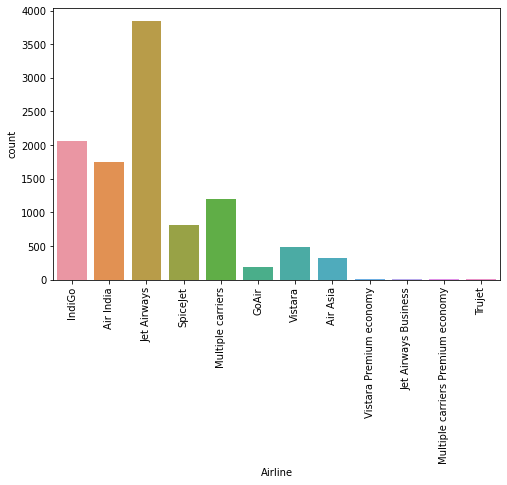

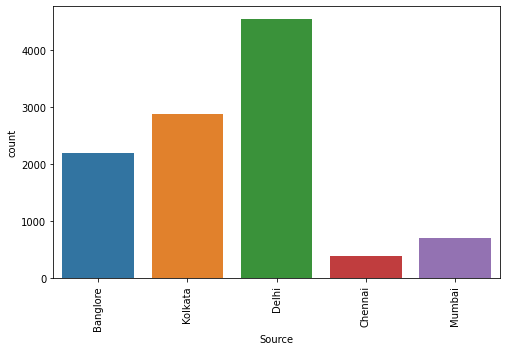

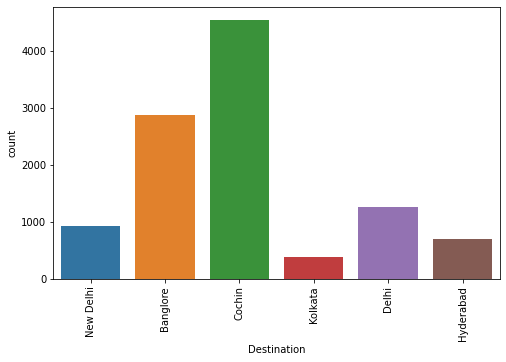

In [63]:
for i in object_col:
    l = list(train_df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.countplot(train_df[i])
    countplot.set_xticklabels(labels = l, rotation = 90)

In [64]:
# Airpline:
# As maximum people are using Jet Airways may be lead to high price of tickets
# Vistara Premium Economy, Jet Airways Business and Multiple carries Premium Economy and Tnujet are having very less
# number of record or only one record

# Source:
# As source column is showing maxium source is from delhi, maximum crowed are travelling from delhi, it may leads to high price of flight
# Very less peoples are traveling from chennai, might be prices decreases there

# Destination:
# Maxium peoples are going to Cochin, and very less are going to Kolkata, they might be leads to increase or decrease the
# price

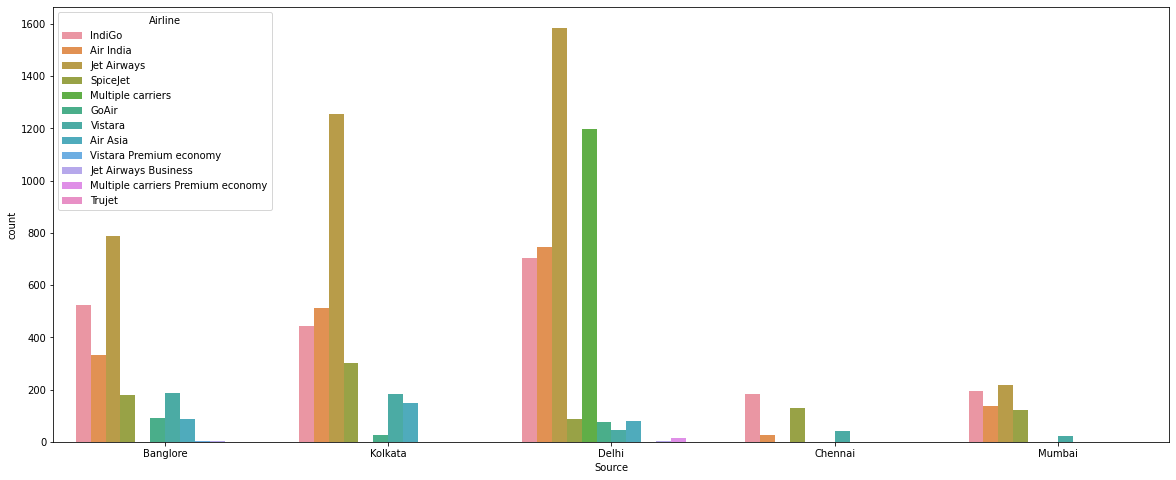

In [65]:
plt.figure(figsize = (20, 8))
countplot = sns.countplot(train_df['Source'], hue = train_df['Airline'])

In [66]:
# As we can see, jet Airways is in trend in Banglore, Kolkata and Delhi city but not in chennai
# May be due to less travler this agency is not providing service there, and other competor are setting their price
# Accordingly

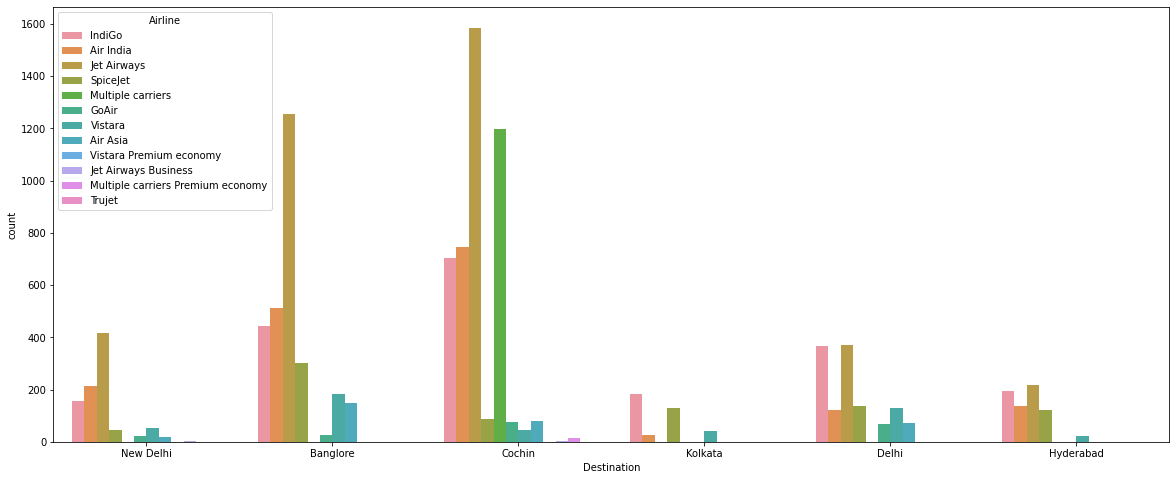

In [67]:
plt.figure(figsize = (20, 8))
countplot = sns.countplot(train_df['Destination'], hue = train_df['Airline'])

In [68]:
# Mutiple Carriers Air service is not in use in various cities, but it is in trend in cochin only
# and about rest cities this airline is not in trend or popular

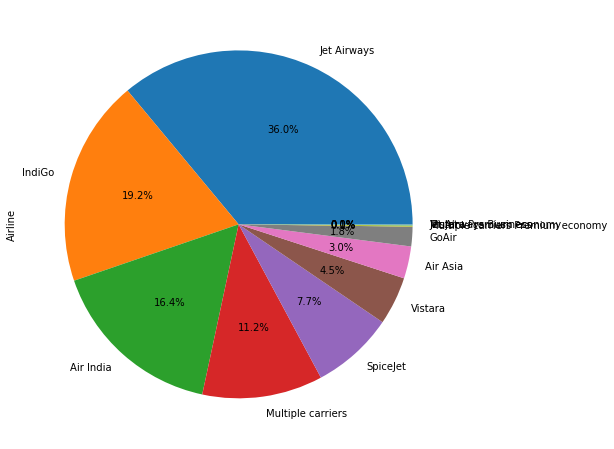

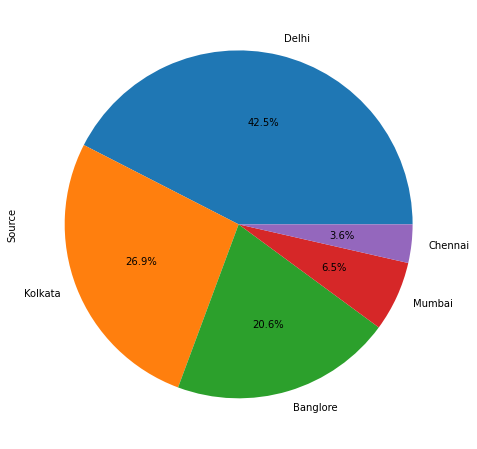

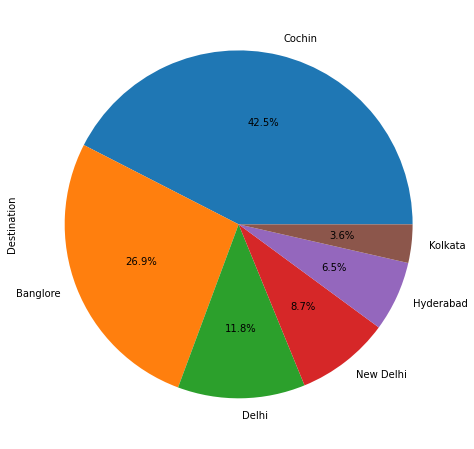

In [69]:
for i in object_col:
    
    plt.figure(figsize = (10, 8))
    train_df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [70]:
# Jet Airways:
# This Airline is most using Airline by the People, as 36 % peoples are using this airline services

# Source: By seeing this pie chart we can say, majority (43.5%) of people are travelling from Delhi
# Destination: Majority of people are travelling to Cochin, it may leads for increase in ticket price

#### For integer type columns

In [71]:
int_col

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_minute',
       'Total_Duration (in min)'],
      dtype='object')

### Checking outliers:

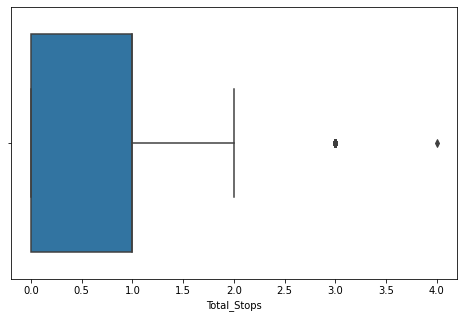

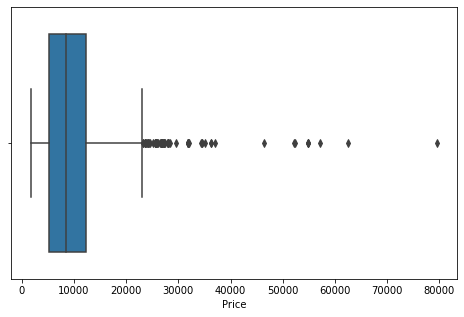

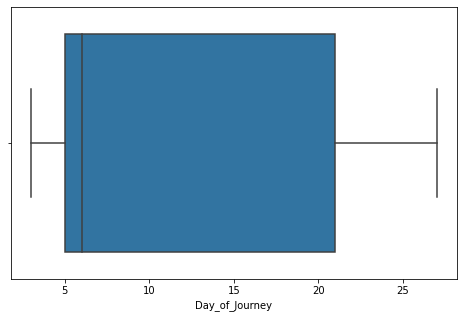

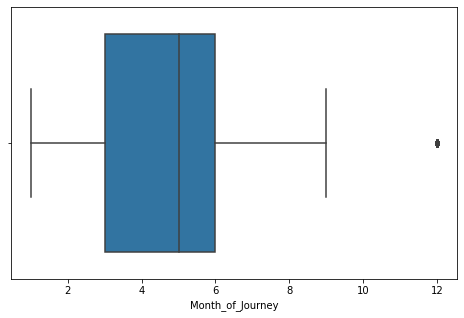

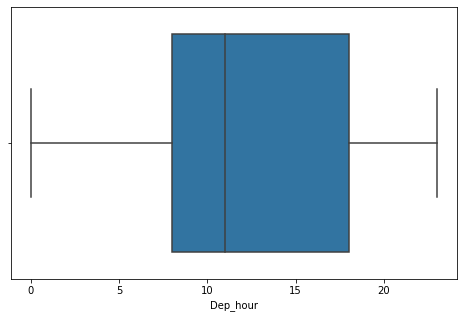

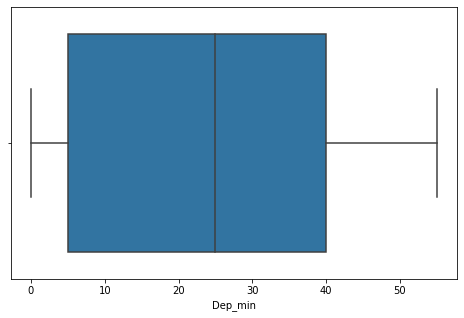

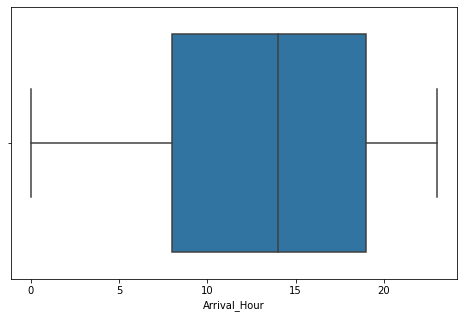

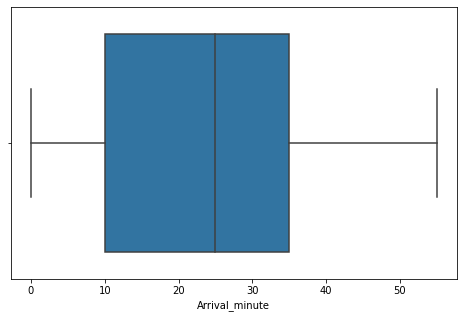

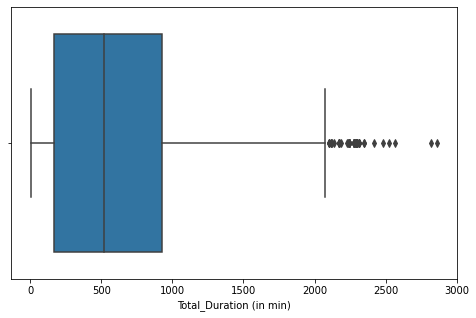

In [72]:
for i in int_col:
    plt.figure(figsize =  (8,5))
    sns.boxplot(train_df[i])

In [73]:
# Total_Stops: 
# Only 2 or few outliers are present in this column
# Minium stop is 0 and maximum is 2 stop but 3 and 4 stops are outliers here

# Price:
# Maximum price is between 2k to 3k but in exceptional case like outliers then prices are 8k too
# This column is containing so many outlires

# Day_of_Journey: No outlier present in this column
# Month_of_journey: In one record will be of December month that why 12th month is seems as outlier

# Dep_hours is also not containing any outlier
# Dep_min : no outlier
# Arrival_hour: no outlier
# Arrival_minute : no outlier

# Price:
# Maximum price is between 2k to 3k but in exceptional case like outliers then prices are 8k too
# This column is containing so many outlires
# Total Duration in min column is containing some outliers

### Check Skewness

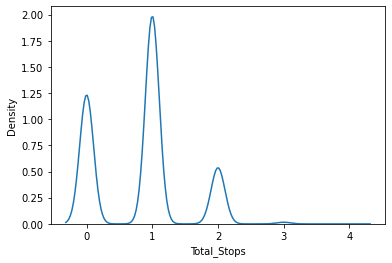

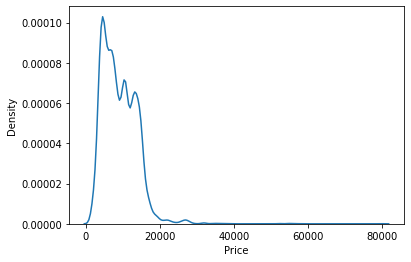

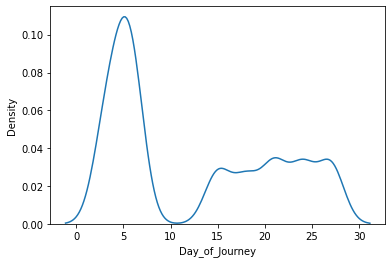

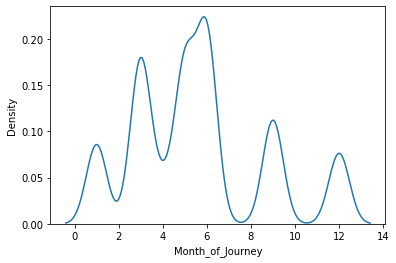

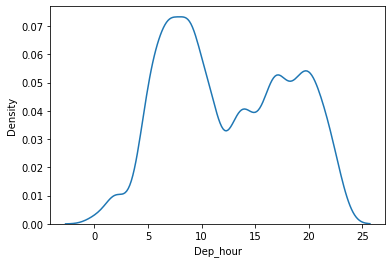

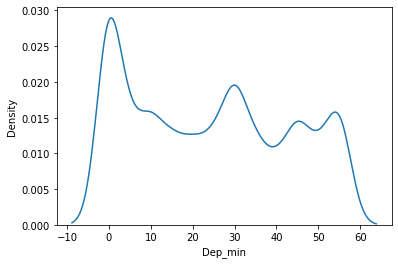

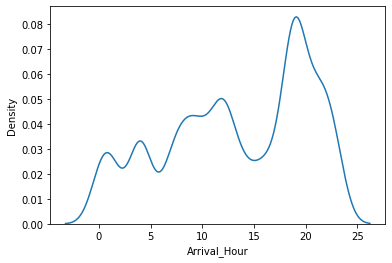

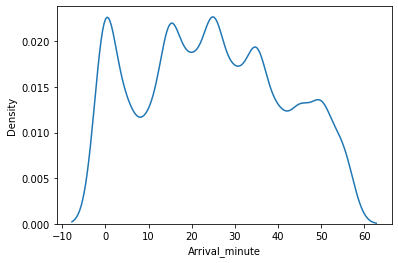

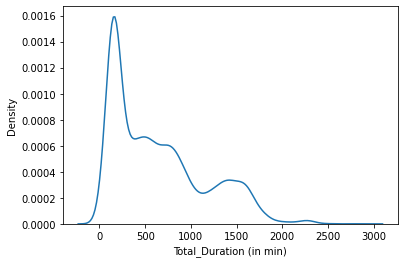

In [74]:
for i in int_col:
    plt.figure()
    sns.distplot(train_df[i], hist = False)

In [75]:
# every column is not normally distributed skewed
# Skewness present in each columns
# Total_Stops:  column is showing some class type skewness
# Price column is right skewed maxium ticket prices are covering in 20K range
# Day_of_journey: is also showing some class type skewness
# Month_of Journey: Showing same graph as day of journey
# Dep_hour: column is toward normally skewed
#  Dep_min column is also towards normally skewed
# Arrival hour and arrival minute , both column is going toward normmaly distributed curve
# Total Duration is Right skewed column

### Distribution of columns

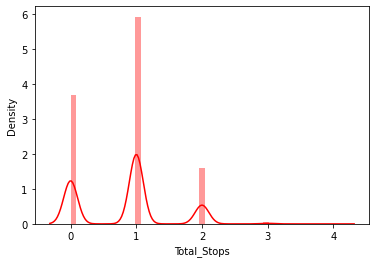

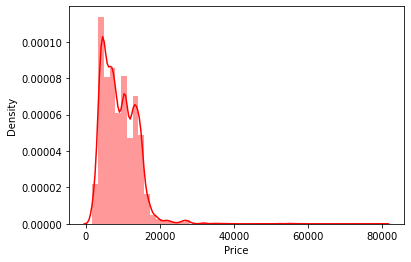

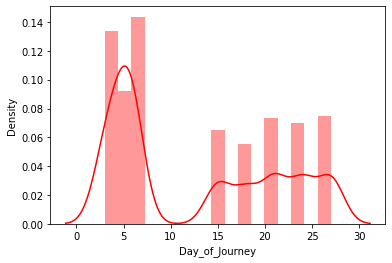

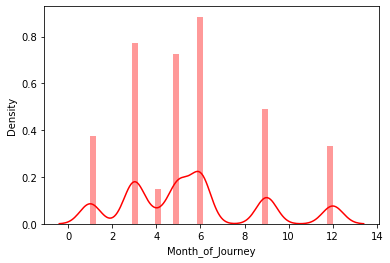

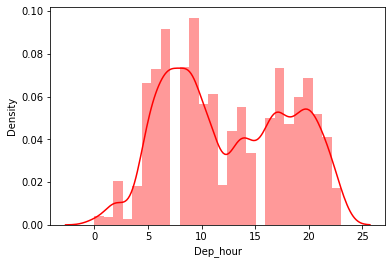

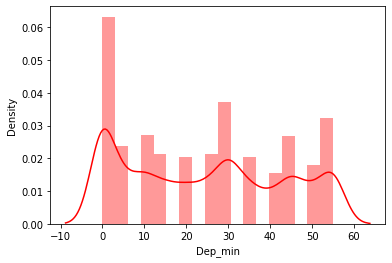

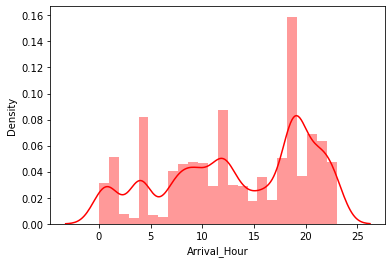

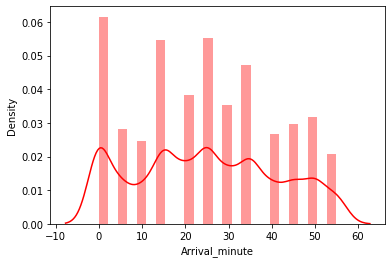

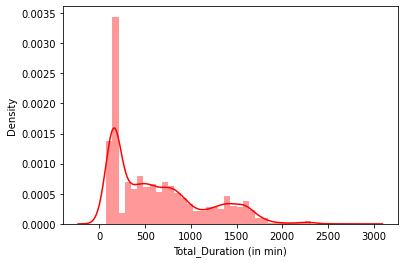

In [76]:
for i in int_col:
    plt.figure()
    sns.distplot(train_df[i], kde = True, color = 'r')

In [77]:
# Total_Stop: Minimum 0 stop and maxium 4 stop , persons are facing during trevel
# Price: Maximum ticket price is covering under 20K
# Day_of_Journey: maxium travller are in 4 to 8th day of the month
# Month_of_Journey: Maxium travlers are travling in the month of Jun
# Dep_hour: maximum flights are leaving passenger at the time of 5 to 12
# Dep_min: maxium records distribution is  same as Dep_hour
# Arrival_hour: majority of pessengers are arriving at 18:00 yo 22: 00
# Majority of prices are lying in the range of 1000

### Spread of float type columns

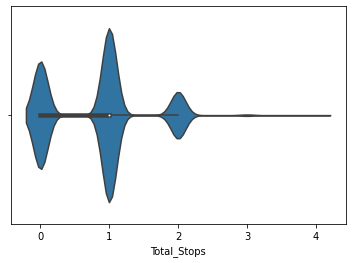

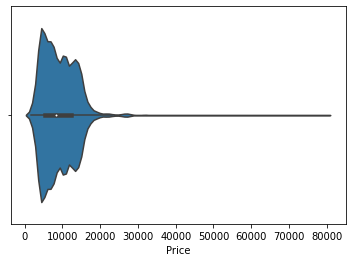

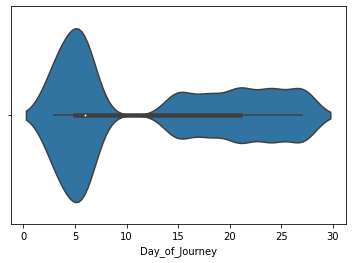

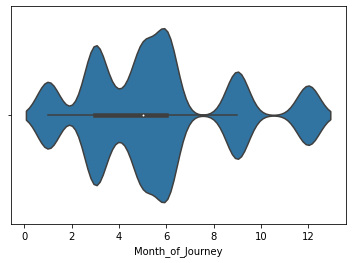

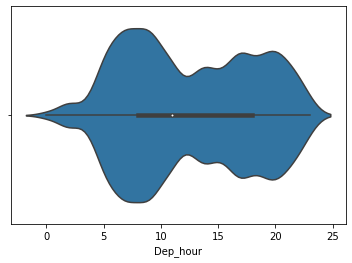

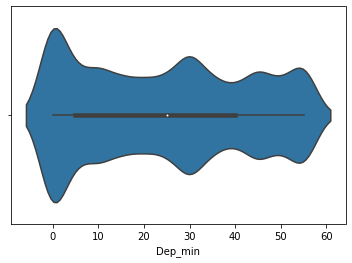

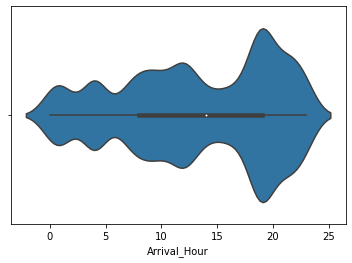

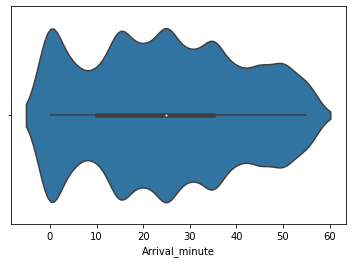

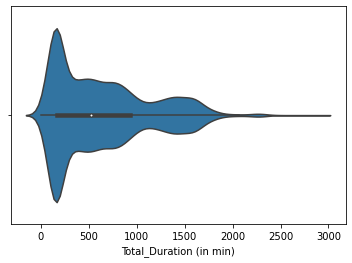

In [78]:
for i in int_col:
    plt.figure()
    sns.violinplot(train_df[i], orient = 'vertical')

In [79]:
# only dep_hour , dep_min, arrival hour, arrival minute columns are well spreaded
# Other the these columns, they are less spreaed as compare to these columns

#### Pattern of Float type columns with each other

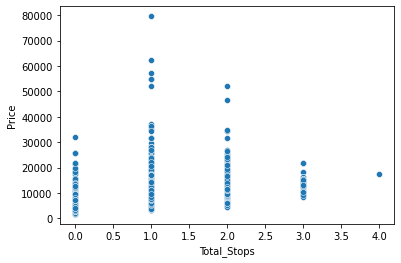

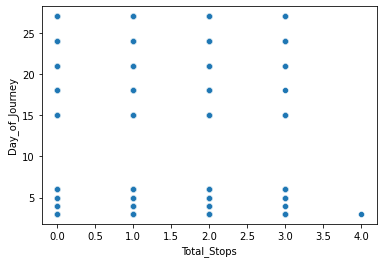

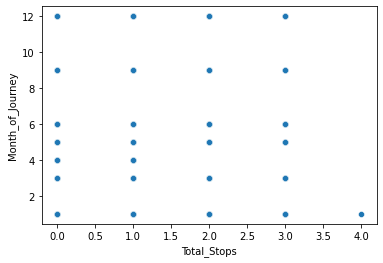

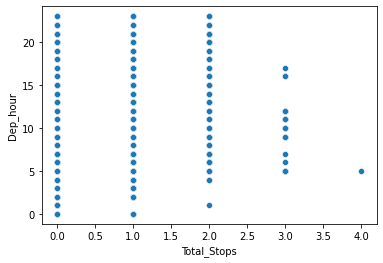

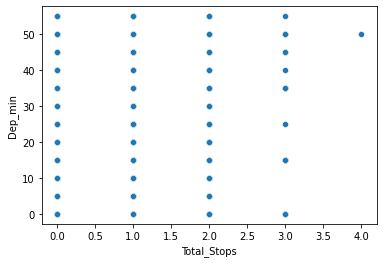

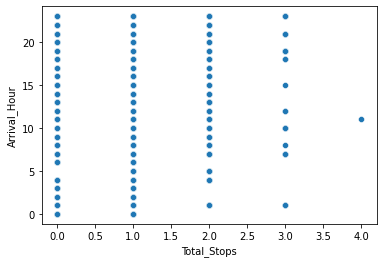

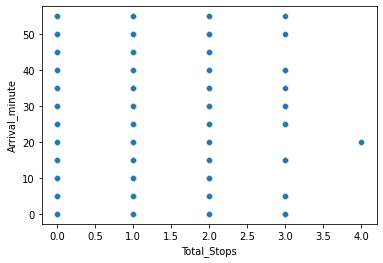

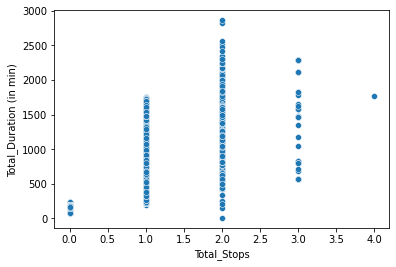

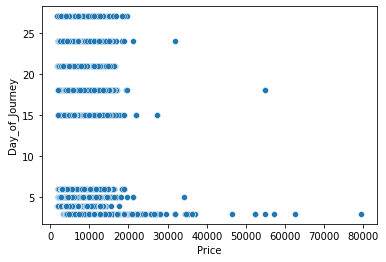

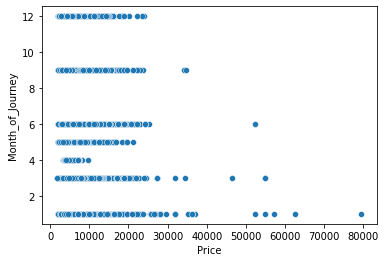

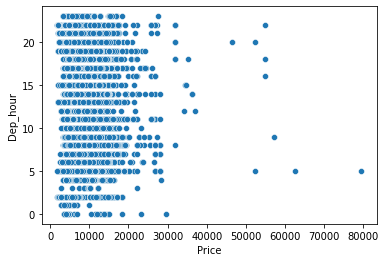

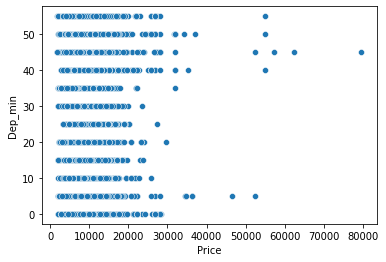

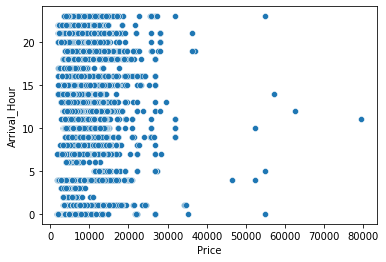

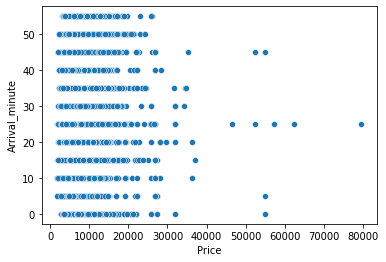

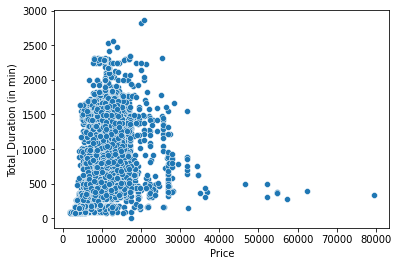

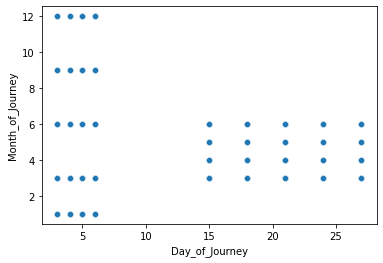

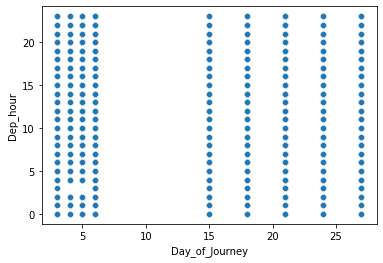

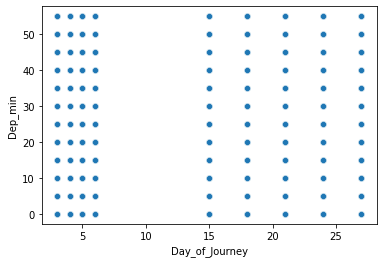

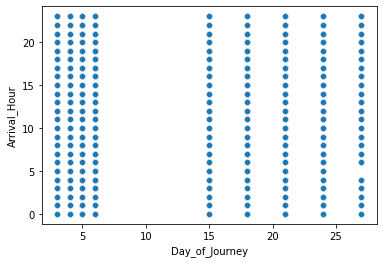

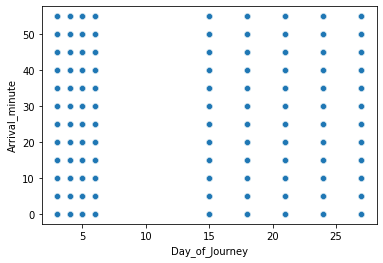

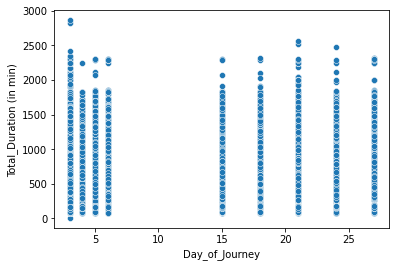

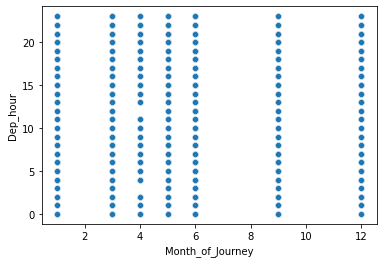

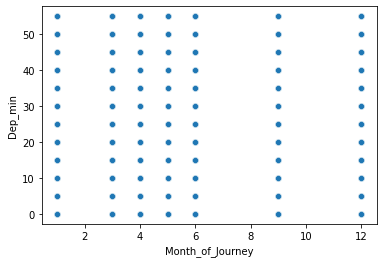

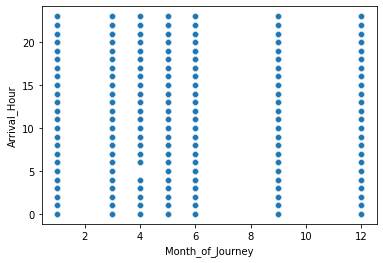

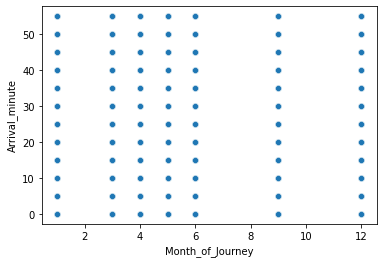

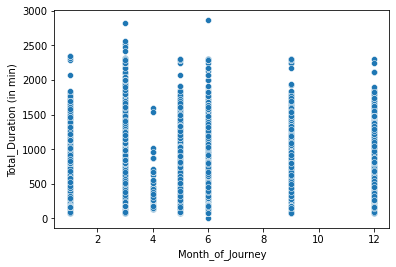

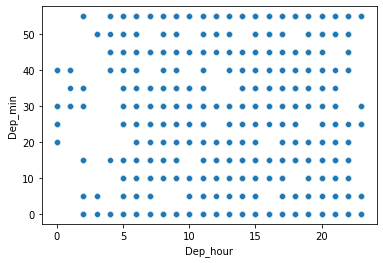

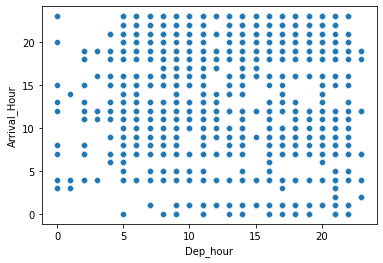

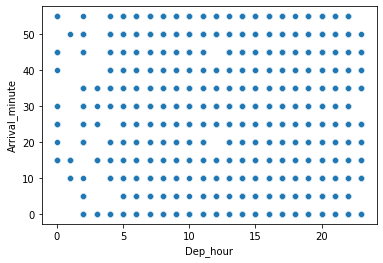

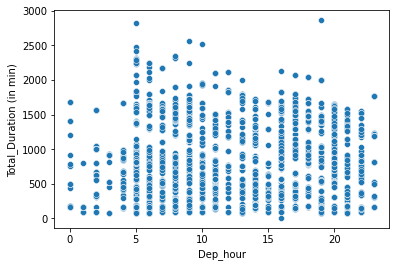

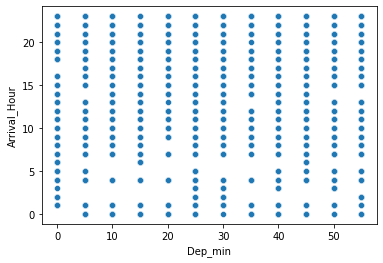

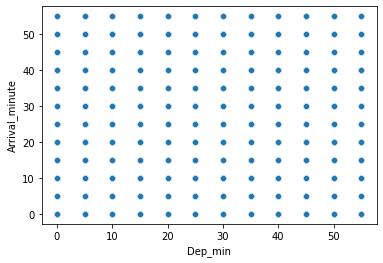

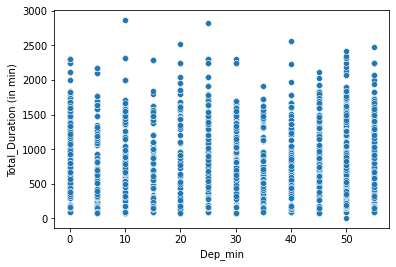

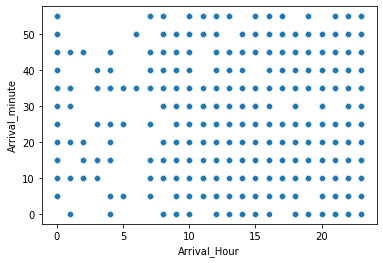

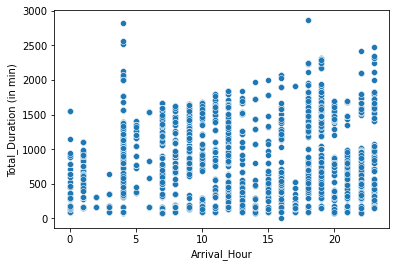

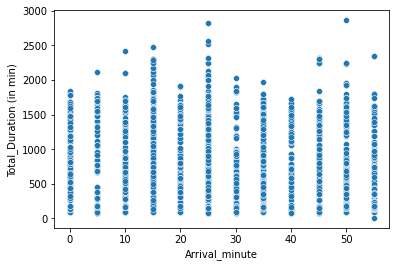

In [80]:
for i in range(len(int_col)):
    for j in int_col[i +1:]:
        plt.figure()
        sns.scatterplot(train_df[int_col[i]], train_df[j])

In [81]:
# No As such pattern found for these int columns

#### Bi-Variate Analysis

In [82]:
object_col

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [83]:
int_col

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_minute',
       'Total_Duration (in min)'],
      dtype='object')

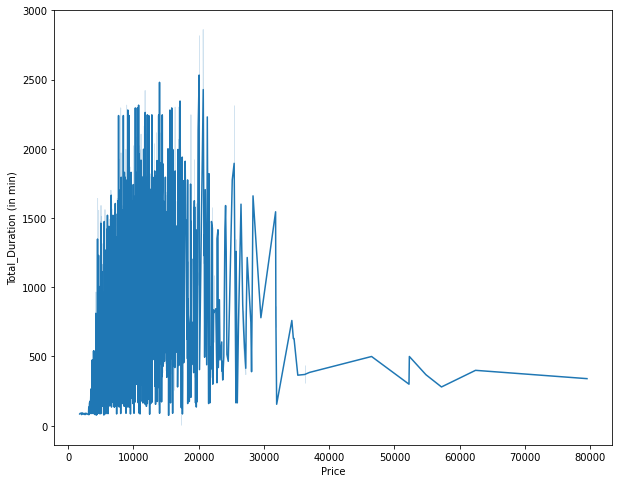

In [84]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Price', y = 'Total_Duration (in min)', data = train_df)
plt.show()

In [85]:
# Duration is not impecting much to the Price of flight ticket

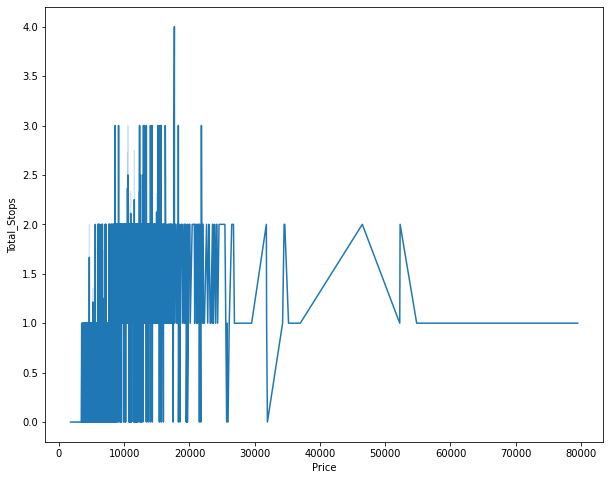

In [86]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Price', y = 'Total_Stops', data = train_df)
plt.show()

In [87]:
# As we can see in the Graph, as number of Stops are increasing, same manner price is also increasing of many records

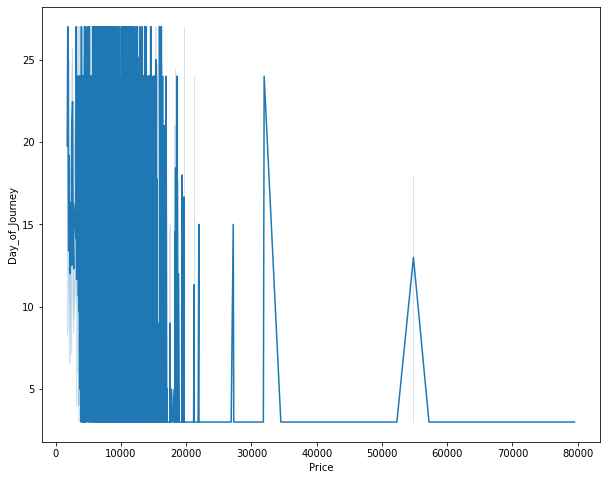

In [88]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Price', y = 'Day_of_Journey', data = train_df)
plt.show()

In [89]:
# not much impact found of journey day on price

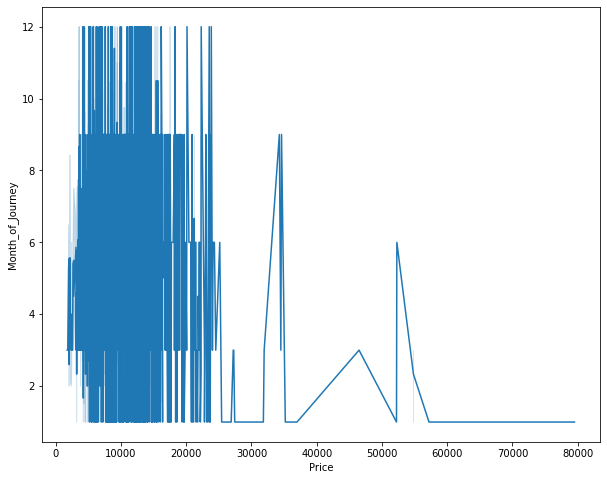

In [90]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Price', y = 'Month_of_Journey', data = train_df)
plt.show()

In [91]:
# not much impact found of journey month on price

In [92]:
object_col

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [93]:
int_col

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_minute',
       'Total_Duration (in min)'],
      dtype='object')

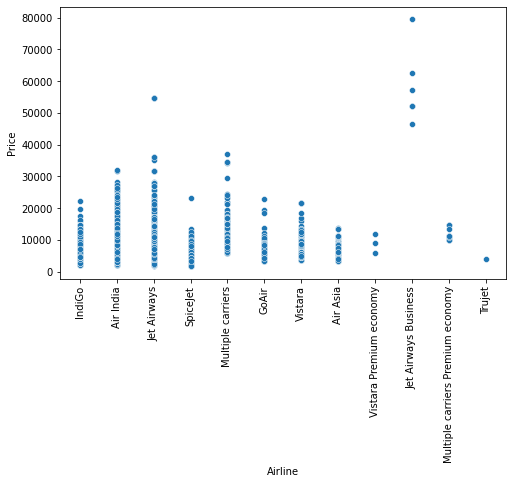

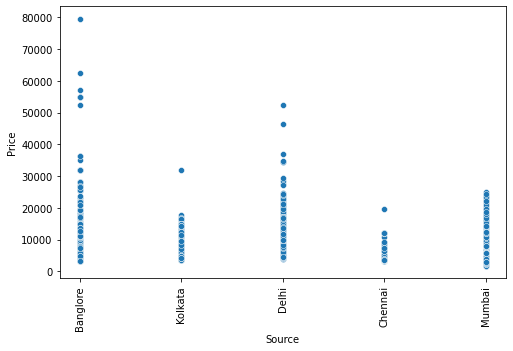

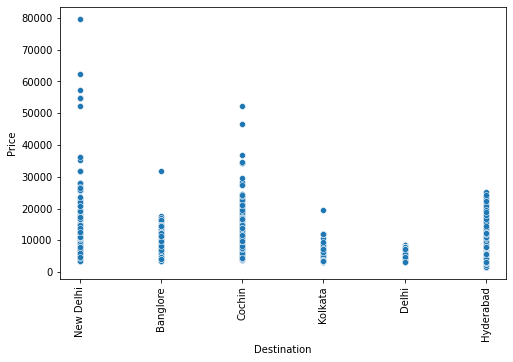

In [94]:
for i in object_col:
    l = list(train_df[i].unique())
    plt.figure(figsize = (8, 5))
    scater = sns.scatterplot(train_df[i], train_df['Price'])
    scater.set_xticklabels(labels = l, rotation = 90)

In [95]:
# Airline vs Price:
# Jet Airways Business is taking highest charges
# Least charges are taken by Indigo, SpiceJet and Trujet

# Source Vs price:
# highest charges are taken to reach bangalore, means city is also depending for ticket price

# Destination vs prices
# If person is going to delhi then he may pay high charges for flight ticket

### Correlation of the columns

In [96]:
train_df.corr()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
Total_Stops,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.738071
Price,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.506480
Day_of_Journey,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038360
Month_of_Journey,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055136
Dep_hour,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_min,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_Hour,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_minute,-0.106940,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Total_Duration (in min),0.738071,0.506480,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663,1.000000


<AxesSubplot:>

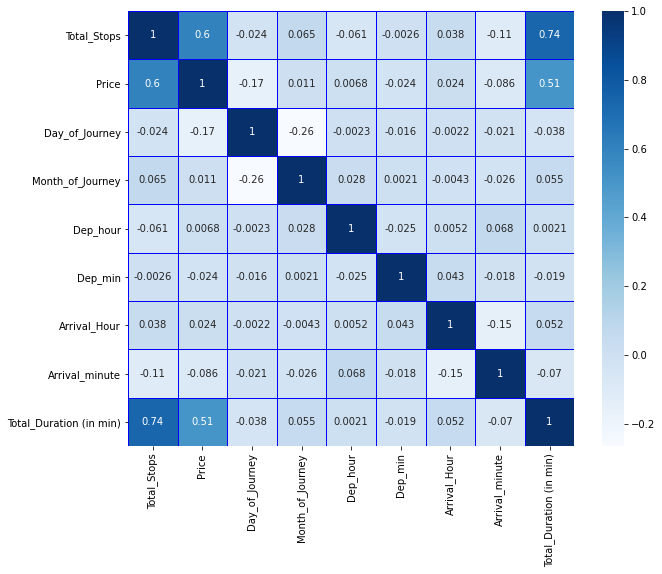

In [97]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [98]:
# strong co-relation found between price and Total_stops
# strong co-relation also found between Total_duration and price

### Describe Data

In [99]:
train_df.describe()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,643.020502
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,507.830133
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,170.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,930.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,2860.000000


<AxesSubplot:>

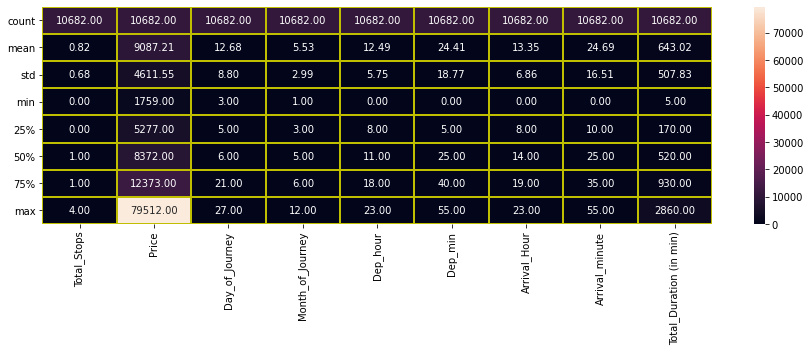

In [100]:
plt.figure(figsize = (15, 4))
sns.heatmap(train_df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [101]:
# High difference found between mean and 50 perentile in day of journey column, which indicating that, 
# this column is skewed

# Total_duration and price column is also showing high difference between mean and 50 Percentile, which indicates
# outliers presence and column skewness

# As we are not find much difference between min and max value of column, which indicating that,
# columns are not highly spreaded

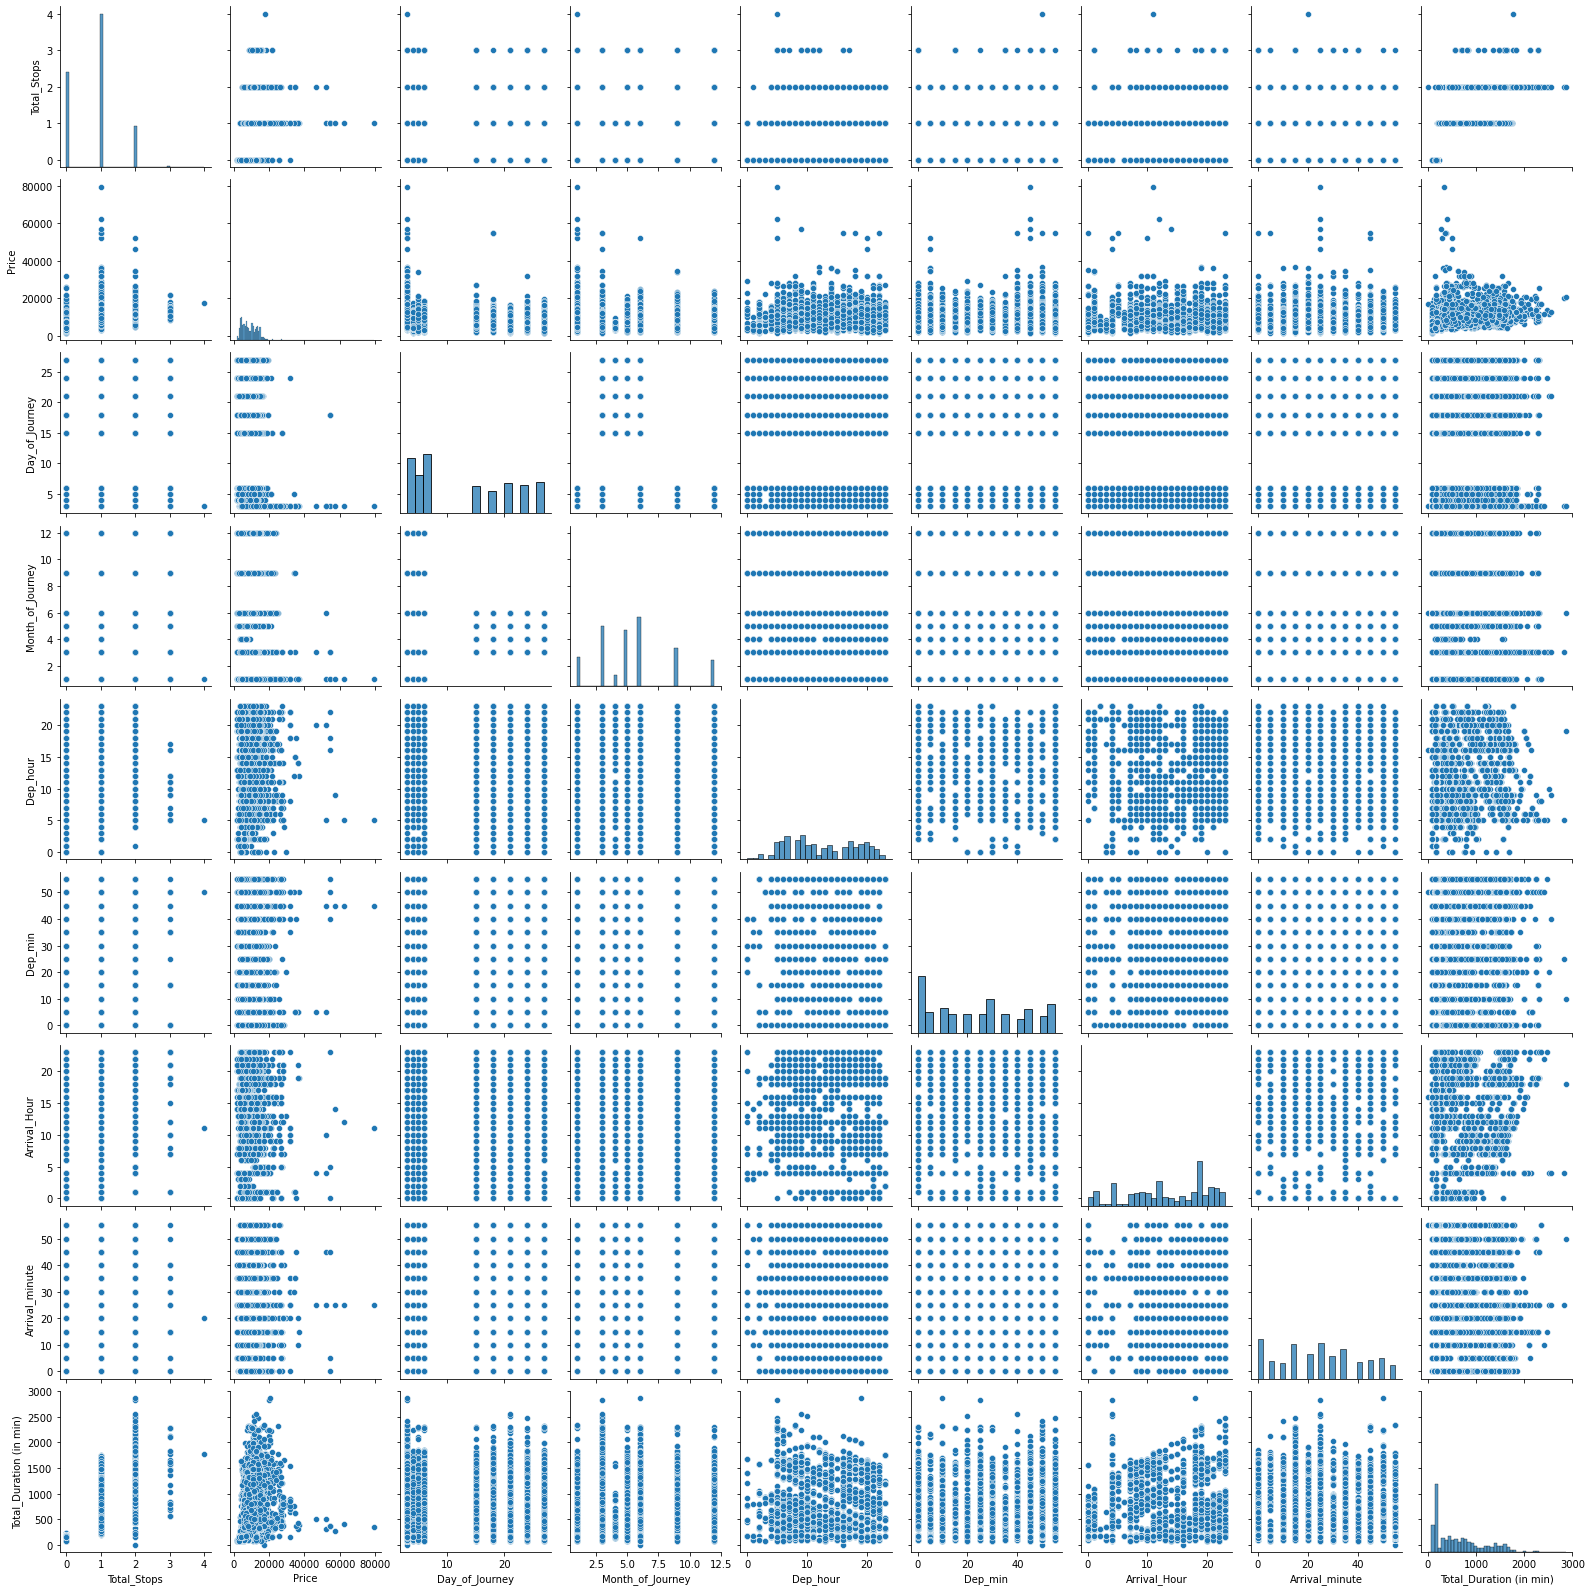

In [102]:
sns.pairplot(train_df)

##### Ordinal Encoding 
 Encoder to the features

In [103]:
# for loop to give value counts for each objec type columns
for i in object_col:
    print('---------------------- ', i, ' ---------------------')
    print(train_df[i].value_counts())

----------------------  Airline  ---------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------  Source  ---------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------  Destination  ---------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [104]:
for i in object_col:
    print('---------------------- ', i, ' ---------------------')
    print(test_df[i].value_counts())

----------------------  Airline  ---------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
----------------------  Source  ---------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
----------------------  Destination  ---------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [105]:
object_col  # Object type columns

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [194]:
# Copy of train_df and test_df
encoded_train = train_df.copy()  
encoded_test = test_df.copy()

In [195]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()   # created instance of Ordinal Encoder

In [196]:
oe.fit(encoded_train[object_col])    # fit from train dataset 
encoded_train[object_col] = oe.transform(encoded_train[object_col])  # Transforming train df 
encoded_test[object_col] = oe.transform(encoded_test[object_col])  # Transforming Test df

In [197]:
print(encoded_train.shape)
print(encoded_test.shape)

# (10682, 12)
# (2671, 11

(10682, 12)
(2671, 11)


In [198]:
encoded_train.head(2) # Top 2 rows of train dataset

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,3.0,0.0,5.0,0,3897,24,3,22,20,1,10,170
1,1.0,3.0,0.0,2,7662,5,1,5,50,13,15,445


In [199]:
encoded_test.head(2)  # Top 2 rows of test dataset

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,4.0,2.0,1.0,1,6,6,17,30,4,25,655
1,3.0,3.0,0.0,1,5,12,6,20,10,20,240


#### Impect of features on Target Variable (Price)

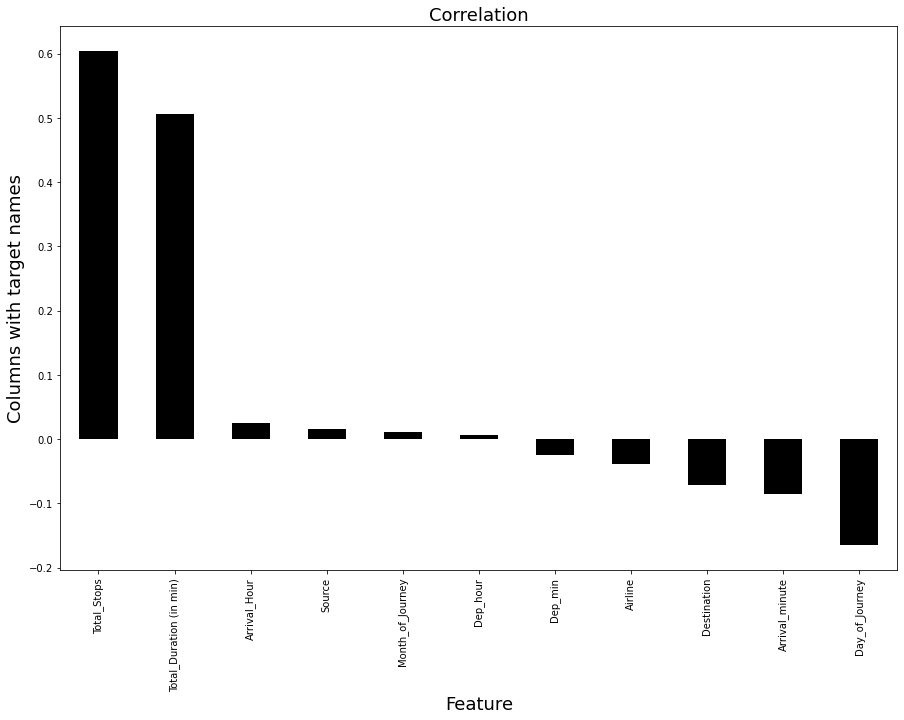

In [200]:
plt.figure(figsize = (15, 10))
encoded_train.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [201]:
# Top 2 columns which are highly impecting positively to target variable
# Total_stops, Total_duration

# Top 2 columns which are highly  impecting negatively to the target variable
# Airline_indigo, Destination_Delhi and Airline_SpiceJet

# We have to make sure these columns should not be remove from the dataset

### Outlier Removing Techniques

#### 1. Try zscore technique

In [202]:
from scipy.stats import zscore
# print(encoded_train.shape)
# print(encoded_test.shape)

In [203]:
z = np.abs(zscore(encoded_train) )
df_z = encoded_train[(z < 3).all(axis = 1)] 
df_z.shape

# (10488, 12)

(10488, 12)

In [204]:
(encoded_train.shape[0] - df_z.shape[0] ) / encoded_train.shape[0]*100

#  1.8161392997566002 
# Only 1 % data loss we are getting by using this method thereforew we will implement his method

1.8161392997566002

#### 2. IQR Technique

In [205]:
Q1 = encoded_train.quantile(0.25)
Q3 = encoded_train.quantile(0.75)
IQR = Q3 - Q1 

In [206]:
df_IQR = encoded_train[~((encoded_train < (Q1 - 1.5*IQR) ) | (encoded_train > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape 
# (2526, 32)

(4240, 12)

In [207]:
(encoded_train.shape[0] - df_IQR.shape[0] ) / encoded_train.shape[0]  * 100

# This method is giving 60% data loss, therefore we can not implement this method to the dataset

60.307058603257815

In [208]:
# Applying to the Original Dataset

In [209]:
z = np.abs(zscore(encoded_train) )
encoded_train = encoded_train[(z < 3).all(axis = 1)] 
encoded_train.shape

(10488, 12)

### Seperating dataset into x1 and y1 form

In [210]:
x = encoded_train.drop(columns= ['Price'])
y = encoded_train['Price']

print('shape of x', x.shape)
print('shape of y', y.shape)
print('shape of test dataset: ', encoded_test.shape)

# # shape of x (10488, 11)
# shape of y (10488,)
# shape of test dataset:  (2643, 11)

shape of x (10488, 11)
shape of y (10488,)
shape of test dataset:  (2671, 11)


### Removing Skewness

In [211]:
skewed_col = ['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_Hour', 'Arrival_minute',
       'Total_Duration (in min)']

In [212]:
x[skewed_col].skew()

# Total_Stops                0.229781
# Day_of_Journey             0.352713
# Month_of_Journey           0.634817
# Dep_hour                   0.100324
# Dep_min                    0.172811
# Arrival_Hour              -0.362901
# Arrival_minute             0.106791
# Total_Duration (in min)    0.778543

Total_Stops                0.229781
Day_of_Journey             0.352713
Month_of_Journey           0.634817
Dep_hour                   0.100324
Dep_min                    0.172811
Arrival_Hour              -0.362901
Arrival_minute             0.106791
Total_Duration (in min)    0.778543
dtype: float64

In [213]:
encoded_test[skewed_col].skew()

# Total_Stops                0.321364
# Day_of_Journey             0.478246
# Month_of_Journey           0.590701
# Dep_hour                   0.093759
# Dep_min                    0.128515
# Arrival_Hour              -0.443166
# Arrival_minute             0.115267
# Total_Duration (in min)    0.896103

Total_Stops                0.321364
Day_of_Journey             0.478246
Month_of_Journey           0.590701
Dep_hour                   0.093759
Dep_min                    0.128515
Arrival_Hour              -0.443166
Arrival_minute             0.115267
Total_Duration (in min)    0.896103
dtype: float64

In [214]:
# apply sqrt (1 + x) transfornation

x['Total_Duration (in min)'] = np.sqrt(1 + x['Total_Duration (in min)'])
x['Month_of_Journey'] = np.sqrt(1 + x['Month_of_Journey'])
x[skewed_col].skew()

# Total_Stops                0.229781
# Day_of_Journey             0.352713
# Month_of_Journey           0.090153
# Dep_hour                   0.100324
# Dep_min                    0.172811
# Arrival_Hour              -0.362901
# Arrival_minute             0.106791
# Total_Duration (in min)    0.316498

Total_Stops                0.229781
Day_of_Journey             0.352713
Month_of_Journey           0.090153
Dep_hour                   0.100324
Dep_min                    0.172811
Arrival_Hour              -0.362901
Arrival_minute             0.106791
Total_Duration (in min)    0.316498
dtype: float64

In [215]:
# transformation for test dataset
encoded_test['Total_Duration (in min)'] = np.sqrt(1 + encoded_test['Total_Duration (in min)'])
encoded_test['Month_of_Journey'] = np.sqrt(1 + encoded_test['Month_of_Journey'])
encoded_test[skewed_col].skew()

# Total_Stops                0.321364
# Day_of_Journey             0.478246
# Month_of_Journey           0.059778
# Dep_hour                   0.093759
# Dep_min                    0.128515
# Arrival_Hour              -0.443166
# Arrival_minute             0.115267
# Total_Duration (in min)    0.345144

Total_Stops                0.321364
Day_of_Journey             0.478246
Month_of_Journey           0.059778
Dep_hour                   0.093759
Dep_min                    0.128515
Arrival_Hour              -0.443166
Arrival_minute             0.115267
Total_Duration (in min)    0.345144
dtype: float64

### Vetting of MultiColinearity 

##### Using VIF Technique

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns   # columns name
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]  # operation to calculate vif
    return (vif)

In [218]:
cal_vif(x[skewed_col])

# Columns Name	VIF
# 0	Total_Stops	6.718628
# 1	Day_of_Journey	2.783534
# 2	Month_of_Journey	10.641378
# 3	Dep_hour	5.425015
# 4	Dep_min	2.584396
# 5	Arrival_Hour	4.439705
# 6	Arrival_minute	3.049008
# 7	Total_Duration (in min)	16.127619

# All vif values are accepatable for this dataset

,Columns Name,VIF
0,Total_Stops,6.718628
1,Day_of_Journey,2.783534
2,Month_of_Journey,10.641378
3,Dep_hour,5.425015
4,Dep_min,2.584396
5,Arrival_Hour,4.439705
6,Arrival_minute,3.049008
7,Total_Duration (in min),16.127619


In [219]:
cal_vif(encoded_test[skewed_col])

# Columns Name	VIF
# 0	Total_Stops	6.811504
# 1	Day_of_Journey	2.670233
# 2	Month_of_Journey	10.509429
# 3	Dep_hour	5.402317
# 4	Dep_min	2.592934
# 5	Arrival_Hour	4.421489
# 6	Arrival_minute	2.964488
# 7	Total_Duration (in min)	16.143095

# All vif values are accepatable for this dataset

,Columns Name,VIF
0,Total_Stops,6.811504
1,Day_of_Journey,2.670233
2,Month_of_Journey,10.509429
3,Dep_hour,5.402317
4,Dep_min,2.592934
5,Arrival_Hour,4.421489
6,Arrival_minute,2.964488
7,Total_Duration (in min),16.143095


###### Standard Scaling 

In [220]:
x.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,3.0,0.0,5.0,0,24,2.000000,22,20,1,10,13.076697
1,1.0,3.0,0.0,2,5,1.414214,5,50,13,15,21.118712
2,4.0,2.0,1.0,2,6,3.162278,9,25,4,25,33.778692
3,3.0,3.0,0.0,1,5,3.605551,18,5,23,30,18.055470
4,3.0,0.0,5.0,1,3,1.414214,16,50,21,35,16.911535


In [221]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # Instance of Standard Scaler

In [222]:
# Scalling Training dataset
x[x.columns] = ss.fit_transform(x[x.columns])
x.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,-0.418205,-1.675215,2.473536,-1.224300,1.276616,-0.850131,1.647939,-0.231431,-1.796975,-0.888040,-1.022847
1,-1.266914,0.883224,-0.972683,1.814861,-0.885292,-1.855111,-1.313906,1.370891,-0.046889,-0.585802,-0.203362
2,0.006150,0.030411,-0.283439,1.814861,-0.771507,1.143882,-0.617001,0.035622,-1.359453,0.018674,1.086697
3,-0.418205,0.883224,-0.972683,0.295281,-0.885292,1.904366,0.951035,-1.032592,1.411515,0.320912,-0.515508
4,-0.418205,-1.675215,2.473536,0.295281,-1.112861,-1.855111,0.602582,1.370891,1.119834,0.623150,-0.632075


In [223]:
# Scaling Testing Dataset
encoded_test[encoded_test.columns] = ss.fit_transform(encoded_test[encoded_test.columns])
encoded_test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,-0.009009,0.032567,-0.294882,0.247853,-0.703853,0.243848,0.773265,0.267704,-1.361709,0.026340,0.233260
1,-0.423903,0.877086,-0.976222,0.247853,-0.820637,1.849719,-1.161445,-0.256324,-0.509324,-0.271771,-0.789348
2,-0.009009,0.032567,-0.294882,0.247853,1.047909,-0.084524,1.125030,-0.518338,0.769252,-1.464213,1.464842
3,0.820778,0.032567,-0.294882,0.247853,1.047909,-0.084524,-0.809679,-1.304381,1.053380,-1.464213,0.469835
4,-1.668584,-1.656471,0.386458,-1.239823,1.398262,0.243848,1.828561,1.577774,-1.645837,1.218783,-1.037438


In [224]:
print(encoded_test.shape)
print(x.shape)

(2671, 11)
(10488, 11)


## Machine learning

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [139]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train )
        testing = r2_score(y_test, m_predict_test)

#         print('At random state', i, 'the training accuracy is :-', training)
#         print('At random state', i, 'the testing accuracy is :-', testing) 
#         print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [140]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train )
        testing = r2_score(y_test, m_predict_test)

        print('At random state', i, 'the training r2_score is :', training)
        print('At random state', i, 'the testing r2_score is :', testing) 
        print('_________________________________________________________________')

In [141]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    m_predict_train = model.predict(x_train)
    m_predict_test = model.predict(x_test)
    
    training = r2_score(y_train, m_predict_train)
    testing = r2_score(y_test, m_predict_test)

    print('Training r2_score is :', training)
    print('Testing r2_score is :', testing) 
    
    print('__________________________________________________________________')
    print('Mean Squared Error: ', mean_squared_error(y_test, m_predict_test) )
    print('Mean Absolute error: ', mean_absolute_error(y_test, m_predict_test) )
    print('___________________________________________________________________')
#     print('Cross value score')
    
# #     # perform cross-validation
# #     for i in range(3, 12):
# #         cv_score = cross_val_score(model, x, y, cv = i ).mean()
# #         print('cv score',  cv_score ,'at', i, 'cross fold')

    plt.figure(figsize = (10, 5))
    plt.scatter(x = y_test, y = m_predict_test, color = 'r')
    plt.plot(y_test, y_test, color = 'g')
    plt.xlabel('Actual', fontsize= 18 )
    plt.ylabel('Predicted', fontsize = 18)
    plt.title(str(algo), fontsize = 20)


### Model 1: RandomForestRegressor

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [383]:
best_random1 = best_randomstate (RandomForestRegressor, x, y)
best_random1

[]

In [384]:
check_model(RandomForestRegressor, x, y, range(15, 100))

At random state 15 the training r2_score is : 0.9528961791772957
At random state 15 the testing r2_score is : 0.8066630502353821
_________________________________________________________________
At random state 16 the training r2_score is : 0.9500659018521451
At random state 16 the testing r2_score is : 0.8112382438024649
_________________________________________________________________
At random state 17 the training r2_score is : 0.9499740044353377
At random state 17 the testing r2_score is : 0.8173766824217401
_________________________________________________________________
At random state 18 the training r2_score is : 0.9516581097856337
At random state 18 the testing r2_score is : 0.8077317795868794
_________________________________________________________________
At random state 19 the training r2_score is : 0.9486814326650621
At random state 19 the testing r2_score is : 0.8178606027348392
_________________________________________________________________
At random state 20 the tr

At random state 58 the training r2_score is : 0.9516155369216972
At random state 58 the testing r2_score is : 0.8108881299838514
_________________________________________________________________
At random state 59 the training r2_score is : 0.951838309497927
At random state 59 the testing r2_score is : 0.8157522806462438
_________________________________________________________________
At random state 60 the training r2_score is : 0.9504170069666686
At random state 60 the testing r2_score is : 0.8194371904283646
_________________________________________________________________
At random state 61 the training r2_score is : 0.9518787706587302
At random state 61 the testing r2_score is : 0.8071765488766337
_________________________________________________________________
At random state 62 the training r2_score is : 0.9509790235000316
At random state 62 the testing r2_score is : 0.8117695080621394
_________________________________________________________________
At random state 63 the tra

Training r2_score is : 0.9492793967687626
Testing r2_score is : 0.826534458476662
__________________________________________________________________
Mean Squared Error:  2820671.5747202937
Mean Absolute error:  1109.392526418864
___________________________________________________________________


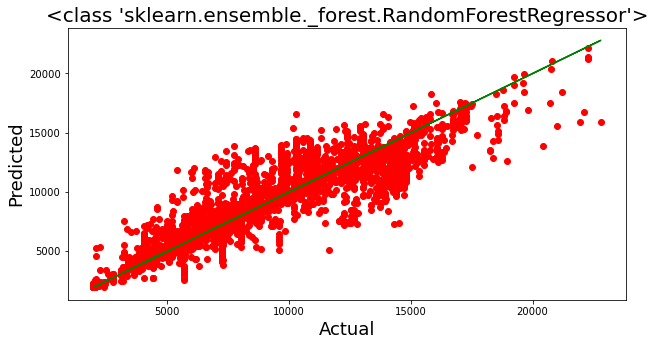

In [386]:
# As per above observation found that model is giving best accuracy at random state 87
train (RandomForestRegressor, x, y, 87)

#### Cross_val_score for RandomForestRegressor

In [388]:
for val in range (2, 8):
    cv = cross_val_score(RandomForestRegressor(), x, y, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.8117002383719154 at cross fold value 2
cv score is 0.8134318402840163 at cross fold value 3
cv score is 0.8102628224293118 at cross fold value 4
cv score is 0.8105804728061177 at cross fold value 5
cv score is 0.8081323385990674 at cross fold value 6
cv score is 0.808354186513079 at cross fold value 7


In [389]:
# Training r2_score is : 0.9492793967687626
# Testing r2_score is : 0.826534458476662
# __________________________________________________________________
# Mean Squared Error:  2820671.5747202937
# Mean Absolute error:  1109.392526418864
# Giving best cv score 0.8134318 at cross fold 3

### Model 2: DecisionTreeRegressor

In [390]:
from sklearn.tree import DecisionTreeRegressor

In [391]:
best_fit2 = best_randomstate(DecisionTreeRegressor, x, y)
print(best_fit2)

[]


In [393]:
max_acc2 = 0
random_s2 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = DecisionTreeRegressor()
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = r2_score(y_test, model2_predict )
    
    if acc > max_acc2:
        max_acc2 = acc
        random_s2 = i
print('Model is giving best accurancy', max_acc2, 'on random state of', random_s2 )

Model is giving best accurancy 0.7378458860128115 on random state of 19


Training r2_score is : 0.9625322390792659
Testing r2_score is : 0.7400478573206237
__________________________________________________________________
Mean Squared Error:  4395618.784483812
Mean Absolute error:  1263.3294248490627
___________________________________________________________________


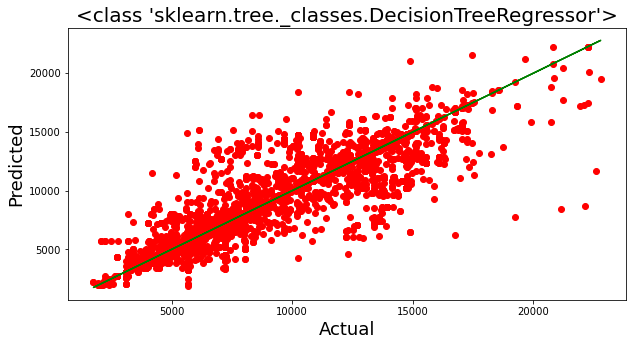

In [395]:
train(DecisionTreeRegressor, x, y, 19)  

In [234]:
# As this model is giving overfitted model
# Training accuracy is greater than testing accuracy

###### CV score for DecisionTreeRegressor

In [396]:
for val in range (2, 8):
    cv = cross_val_score(DecisionTreeRegressor(), x, y, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.7068108936680093 at cross fold value 2
cv score is 0.7042343773610669 at cross fold value 3
cv score is 0.6987291925948325 at cross fold value 4
cv score is 0.7042892508422749 at cross fold value 5
cv score is 0.7002631341949459 at cross fold value 6
cv score is 0.7120921571467159 at cross fold value 7


In [397]:
# Training r2_score is : 0.9625322390792659
# Testing r2_score is : 0.7400478573206237
# __________________________________________________________________
# Mean Squared Error:  4395618.784483812
# Mean Absolute error:  1263.3294248490627

# Getting Highest cv score 0.7120921 at cross fold 7

### Model 3: AdaBoostRegressor

In [399]:
from sklearn.ensemble import AdaBoostRegressor

In [400]:
best_fit3 = best_randomstate(AdaBoostRegressor, x, y)
print(best_fit3)

[1, 7, 8, 9, 12, 14, 17, 19, 23, 26, 29, 32, 33, 41, 52, 56, 57, 59, 62, 63, 64, 69, 72, 81, 82, 89, 92, 97, 107, 112, 113, 118, 121, 124, 130, 131, 134, 139, 141, 149, 151, 154, 155, 165, 168, 172, 173, 176, 177, 178, 181, 186, 187, 190, 193]


In [401]:
check_model(AdaBoostRegressor, x, y, best_fit3)

At random state 1 the training r2_score is : 0.5904605965633478
At random state 1 the testing r2_score is : 0.5916999163249606
_________________________________________________________________
At random state 7 the training r2_score is : 0.5902360376124733
At random state 7 the testing r2_score is : 0.5880593220696069
_________________________________________________________________
At random state 8 the training r2_score is : 0.6234335475642481
At random state 8 the testing r2_score is : 0.6348019062965209
_________________________________________________________________
At random state 9 the training r2_score is : 0.5934327804318008
At random state 9 the testing r2_score is : 0.5983223880295239
_________________________________________________________________
At random state 12 the training r2_score is : 0.6129824185474888
At random state 12 the testing r2_score is : 0.6089333608487109
_________________________________________________________________
At random state 14 the training r

At random state 155 the training r2_score is : 0.6037167724780799
At random state 155 the testing r2_score is : 0.6057538707627776
_________________________________________________________________
At random state 165 the training r2_score is : 0.5863949318988728
At random state 165 the testing r2_score is : 0.583421912930289
_________________________________________________________________
At random state 168 the training r2_score is : 0.5951414344566571
At random state 168 the testing r2_score is : 0.5905452644696862
_________________________________________________________________
At random state 172 the training r2_score is : 0.6117472267826813
At random state 172 the testing r2_score is : 0.6078820854169679
_________________________________________________________________
At random state 173 the training r2_score is : 0.5981829422583982
At random state 173 the testing r2_score is : 0.6005906013630464
_________________________________________________________________
At random state 

Training r2_score is : 0.6284477261745469
Testing r2_score is : 0.6256590003669305
__________________________________________________________________
Mean Squared Error:  6121750.456602058
Mean Absolute error:  2077.2502759745935
___________________________________________________________________


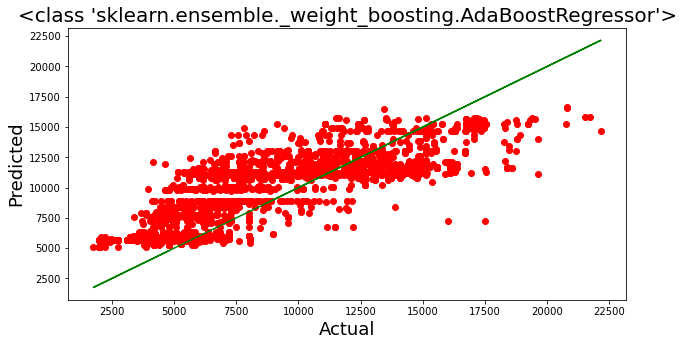

In [402]:
train(AdaBoostRegressor, x, y, 32)  

##### Cross val Score for AdaBoostRegressor

In [403]:
for val in range (2, 8):
    cv = cross_val_score(AdaBoostRegressor(), x, y, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.5997395435248762 at cross fold value 2
cv score is 0.5949063638959275 at cross fold value 3
cv score is 0.6020611313061571 at cross fold value 4
cv score is 0.6006210835263459 at cross fold value 5
cv score is 0.5997933364755815 at cross fold value 6
cv score is 0.5964005333603681 at cross fold value 7


In [177]:
# Training r2_score is : 0.6284477261745469
# Testing r2_score is : 0.6256590003669305
# __________________________________________________________________
# Mean Squared Error:  6121750.456602058
# Mean Absolute error:  2077.2502759745935

# Giving highest CV value 0.6020611 at cross fold 4

#### Model 4: KNeighborsRegressor

In [404]:
from sklearn.neighbors import KNeighborsRegressor

In [405]:
best_fit4 = best_randomstate(KNeighborsRegressor, x, y)
print(best_fit4)

[]


In [407]:
max_acc2 = 0
random_s2 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = KNeighborsRegressor()
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = r2_score(y_test, model2_predict )
    
    if acc > max_acc2:
        max_acc2 = acc
        random_s2 = i
print('Model is giving best accurancy', max_acc2, 'on random state of', random_s2 )

Model is giving best accurancy 0.7246600720536827 on random state of 58


Training r2_score is : 0.8006129925533714
Testing r2_score is : 0.7246600720536827
__________________________________________________________________
Mean Squared Error:  4551845.033555767
Mean Absolute error:  1540.5919923736892
___________________________________________________________________


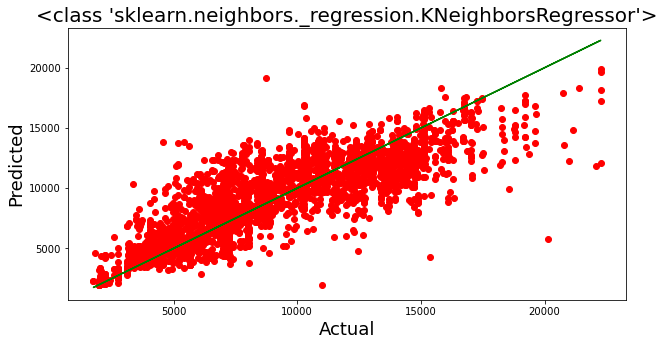

In [408]:
train(KNeighborsRegressor, x, y, 58)  

##### Cross val Score for KNeighborsRegressor

In [409]:
for val in range (5, 15):
    cv = cross_val_score(KNeighborsRegressor(), x, y,  cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.7102590119233203 at cross fold value 5
cv score is 0.7117178355773083 at cross fold value 6
cv score is 0.7131621438725345 at cross fold value 7
cv score is 0.7146758592525981 at cross fold value 8
cv score is 0.7149813102003127 at cross fold value 9
cv score is 0.7176374791344364 at cross fold value 10
cv score is 0.71825013697549 at cross fold value 11
cv score is 0.7193746622996731 at cross fold value 12
cv score is 0.7185416139926757 at cross fold value 13
cv score is 0.7190226826594294 at cross fold value 14


In [ ]:
# Training r2_score is : 0.8006129925533714
# Testing r2_score is : 0.7246600720536827
# __________________________________________________________________
# Mean Squared Error:  4551845.033555767
# Mean Absolute error:  1540.5919923736892

# Giving best cv score  0.7185416 at cross fold at 13

### Model 4: GradientBoostingRegressor

In [147]:
best_fit5 = best_randomstate(GradientBoostingRegressor, x, y)
print(best_fit5)

[8, 10, 18, 28, 29, 46, 50, 52, 54, 62, 74, 81, 94, 102, 113, 114, 124, 127, 131, 132, 140, 149, 155, 159, 165, 167, 177, 181, 199]


In [148]:
check_model(GradientBoostingRegressor, x, y,best_fit5)

At random state 8 the training r2_score is : 0.7891087823127994
At random state 8 the testing r2_score is : 0.792373269918534
_________________________________________________________________
At random state 10 the training r2_score is : 0.7873689153933539
At random state 10 the testing r2_score is : 0.7850306579483983
_________________________________________________________________
At random state 18 the training r2_score is : 0.7883679513183781
At random state 18 the testing r2_score is : 0.7877038777167689
_________________________________________________________________
At random state 28 the training r2_score is : 0.7918707332872916
At random state 28 the testing r2_score is : 0.7863209494707153
_________________________________________________________________
At random state 29 the training r2_score is : 0.7884251995326355
At random state 29 the testing r2_score is : 0.7852771375464389
_________________________________________________________________
At random state 46 the train

Training r2_score is : 0.7881319780337414
Testing r2_score is : 0.791943247898335
__________________________________________________________________
Mean Squared Error:  3374634.182178837
Mean Absolute error:  1381.4848552237997
___________________________________________________________________


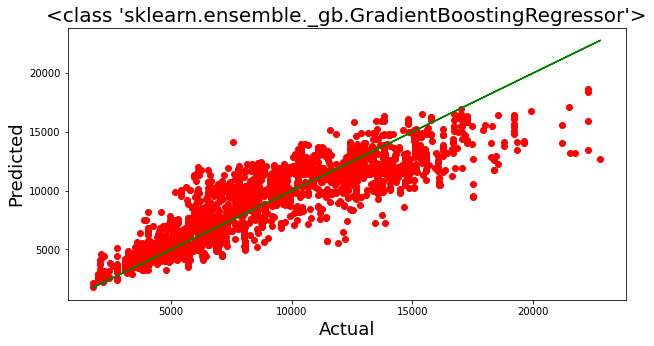

In [149]:
train(GradientBoostingRegressor, x, y, 181)  

In [150]:
for val in range (2, 8):
    cv = cross_val_score(GradientBoostingRegressor(), x, y,  cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.7772167882869863 at cross fold value 2
cv score is 0.7779965505229608 at cross fold value 3
cv score is 0.7796767907352001 at cross fold value 4
cv score is 0.7784817377711117 at cross fold value 5
cv score is 0.7802221713588757 at cross fold value 6
cv score is 0.7795942248709313 at cross fold value 7


In [151]:
# Training r2_score is : 0.7881319780337414
# Testing r2_score is : 0.791943247898335
# __________________________________________________________________
# Mean Squared Error:  3374634.182178837
# Mean Absolute error:  1381.4848552237997

# Showing highest cv score value 0.7802 at cross fold 6
# r2_score for both train and test, and cv value these three are very near to each other

In [230]:
# Model	                      Training Acc.	   Testing Acc.	       CV	    Difference
# RandomForestRegressor    	  0.9492793	       0.826534	         0.813431	0.013103
# DecisionTreeRegressor	      0.962532	       0.740047	         0.712092	0.027955
# AdaBoostRegressor 	      0.628447	       0.625659	         0.602061	0.023598
# KNeighborsRegressor	      0.800612	       0.72466	         0.718541	0.006119
# GradientBoostingRegressor   0.788131	       0.791943	         0.78022217	0.01172083


# RandomForestRegressor:
# This model is giving difference between accuracy of training and testing data, but giving very close cv 
# to the test accuracy

# DecisionTreeRegressor:
# This model is giving overfitted model, its training accuracy is greater than testing accuracy

# AdaBoostRegressor:
# This model is not showing overfitting or underfitting model but showing highest difference between cv
# and accuracy in above mentioned model

# KNeighborsRegressor : is showing least difference between cv and accuracy, but having difference in train accuracy and test
# accuracy

# GradientBoostingRegressor: is having very low difference between accuracy of test and training and also having cv score value
# which is very near to test accuracy
# Hence we finalize this model as our final model


##### Ensemble Techniques for GradientBoostingRegressor

In [152]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 181)

# As by above experiment, GradientBoostingRegressor model is giving highest cross val score value at cross fold 6 and
# random state 181

In [156]:
parameter = {'alpha' : [0.9, 0.09, 0.1], 
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [ 3, 4, 5],
             'min_samples_leaf' : [1, 2, 3], 
            'min_samples_split': [2,3,4], 
            'n_estimators': [100, 50, 10]} 

In [157]:
gcv = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = parameter, cv = 6)

In [158]:
gcv.fit(x_train, y_train)

# GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
#              param_grid={'alpha': [0.9, 0.09, 0.1],
#                          'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
#                          'min_samples_leaf': [1, 2, 3],
#                          'min_samples_split': [2, 3, 4],
#                          'n_estimators': [100, 50, 10]})

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.9, 0.09, 0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 10]})

In [159]:
gcv.best_params_

# {'alpha': 0.1,
#  'learning_rate': 0.1,
#  'max_depth': 5,
#  'min_samples_leaf': 1,
#  'min_samples_split': 3,
#  'n_estimators': 100}

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

### Final model (GradientBoostingRegressor)

In [160]:
# Finding best accuracy random state
max_acc2 = 0
random_s2 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 100  )
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = r2_score(y_test, model2_predict )
    
    if acc > max_acc2:
        max_acc2 = acc
        random_s2 = i
print('Model is giving best accurancy', max_acc2, 'on random state of', random_s2 )

# Model is giving best accurancy 0.841012400697513 on random state of 159

Model is giving best accurancy 0.841012400697513 on random state of 159


In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 159)

final_model = GradientBoostingRegressor(alpha = 0.1, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 100  )
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

train_accuracy = r2_score(y_train, final_pred_train )
test_accuracy = r2_score(y_test, final_pred )
print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(y_test, final_pred ) )
print('Mean absolute error: ', mean_absolute_error(y_test, final_pred) )

# Training accuracy:  0.8697043961520623
# Testing accuracy:  0.8409641466398378
# ______________________________________________
# Mean squared error:  2553265.335125538
# Mean absolute error:  1164.2586762206856

Training accuracy:  0.8697043961520623
Testing accuracy:  0.8409641466398378
______________________________________________
Mean squared error:  2553265.335125538
Mean absolute error:  1164.2586762206856


In [162]:
# After applying Ensemble Techniques, accuracy have increased 

In [165]:
cross_val_score(final_model, x, y, cv = 4).mean()  # Cross validation for final model

# 0.8322980704199643

0.8322980704199643

In [166]:
# We can see, accuracy of train and test is very near to each other, 
# and cv is also very close very close to accuracy of train and test dataset 

# Training accuracy:  0.8697043961520623
# Testing accuracy:  0.8409641466398378
# ______________________________________________
# Mean squared error:  2553265.335125538
# Mean absolute error:  1164.2586762206856

# CV Score: # 0.8322980704199643

### Graph

Text(0.5, 1.0, 'GradientBoostingRegressor Machine Learning Model')

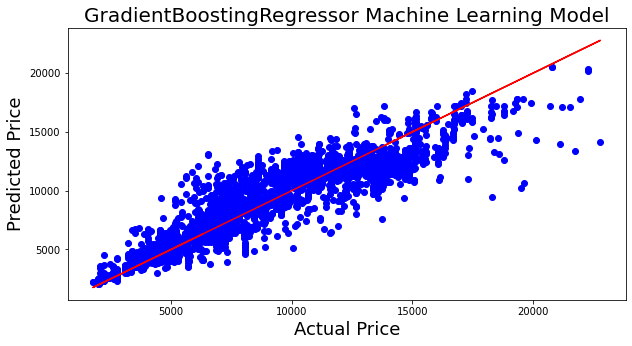

In [169]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Price', fontsize= 18 )
plt.ylabel('Predicted Price', fontsize = 18)
plt.title('GradientBoostingRegressor Machine Learning Model', fontsize = 20)

### Deploy Model

In [170]:
import pickle
filename = 'flight_price_predictor.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Loading model

In [171]:
load_model =  pickle.load(open('flight_price_predictor.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

0.8409641466398378


### Conclusion

In [173]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)
# convert columns in to np.array 

In [174]:
# print(predicted.shape)
# print(original.shape)
# print(x_test.shape)
# print(y_test.shape)

### Conclusion DataFrame

In [175]:
conclusion = pd.DataFrame({'Actual Price': original, 'Predicted Price': predicted}, index = range(len(original)))

In [180]:
conclusion.sample(10)

,Actual Price,Predicted Price
38,9412,9896.450746
2910,4563,3895.646448
1368,9646,10077.917193
3095,14781,12118.477717
1624,14714,12012.638169
2266,6206,7093.071150
329,12402,11170.675358
2164,8610,8475.524190
2977,4460,4142.006419
2373,8366,8931.455532


### Prediction for test dataset

In [227]:
encoded_test.shape  # Test dataset shape

(2671, 11)

In [228]:
encoded_test.head(2)  # Top 2 rows of encoded test dataset

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,-0.009009,0.032567,-0.294882,0.247853,-0.703853,0.243848,0.773265,0.267704,-1.361709,0.026340,0.233260
1,-0.423903,0.877086,-0.976222,0.247853,-0.820637,1.849719,-1.161445,-0.256324,-0.509324,-0.271771,-0.789348


In [229]:
price_predictor =  pickle.load(open('flight_price_predictor.pkl', 'rb'))  # Loading price_predictor model

In [230]:
predicted_price = np.array(price_predictor.predict(encoded_test))  
# Predicting price by price_predictor model and storing it into array

In [234]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min)
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,170


In [238]:
test_df['Predicted_Price'] = predicted_price  # Adding column of price in the test_dataset

In [240]:
test_df.head()
# here we have successfully calculated test_dataset price

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_Hour,Arrival_minute,Total_Duration (in min),Predicted_Price
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,655,12135.251301
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,240,5372.368204
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,1425,13015.062327
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,780,10837.136622
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,170,3676.018281
